# Ценообразование квартир Ленинградской области

**Цель исследования** — определить параметры, влияющие на ценообразование жилой недвижимости в Ленинградской области. Другими словами, необходимо научится определять рыночную стоимость объектов недвижимости.

**Ход исследования**

О качестве данных ничего не известно, поэтому перед исследованием необходимо провести обзор данных.
 
Таким образом, исследование пройдёт в 4 этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Обогащение данных.
 4. Выявление факторов наибольшего влияния.

**Дальнейшее применение**

Результаты исследование могут быть применены для широкого спектра задач об оценки недвижимости. Например, выявление машеннической деятельности, создание рекомендательной системы для досок объявлений о продаже жилой недвижимости.

## 1. Обзор данных

Данные представляют собой выборку объявлений о продаже объектов жилой недвижимости в Ленинградской области. Поля-столбцы делятся на 2 категории: заполненные пользователем, введённые автоматически на основе картографических данных (например, данные о водоёмах: расстояние до ближайшего, количество в радиусе 3 км и тд).

### 1.1. Подключение модулей

In [817]:
# Построение графиков
from matplotlib import pyplot as plt

# Работа с базами данных
import pandas as pd

### 1.2. Общая сведения о данных

Считываем исходный файл `./real_estate_data.csv`. Аргументом *sep* указываем на разделительный символ:

In [818]:
df = pd.read_csv('./real_estate_data.csv', sep='\t')

Выведим первые 5 строк данных:

In [819]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Выведим общие сведения о выборке:

In [820]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Размерность таблицы** 23699×22.

**Согласно документации к данным:**

0. `total_images` — число фотографий квартиры в объявлении
1. `last_price` — цена на момент снятия с публикации
2. `total_area` — общая площадь квартиры в квадратных метрах (м²)
3. `first_day_exposition` — дата публикации
4. `rooms` — число комнат
5. `ceiling_height` — высота потолков (м)
6. `floors_total` — всего этажей в доме
7. `living_area` — жилая площадь в квадратных метрах (м²)
8. `floor` — этаж
9. `is_apartment` — апартаменты (булев тип)
10. `studio` — квартира-студия (булев тип)
11. `open_plan` — свободная планировка (булев тип)
12. `kitchen_area` — площадь кухни в квадратных метрах (м²)
13. `balcony` — число балконов
14. `locality_name` — название населённого пункта
15. `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
16. `cityCenters_nearest` — расстояние до центра города (м)
17. `parks_around3000` — число парков в радиусе 3 км
18. `parks_nearest` — расстояние до ближайшего парка (м)
19. `ponds_around3000` — число водоёмов в радиусе 3 км
20. `ponds_nearest` — расстояние до ближайшего водоёма (м)
21. `days_exposition` — сколько дней было размещено объявение (от публикации до снятия)

**Обобщение**

Каждая строка - это описание квартиры.

Почти во всех столбцах данных присутсвуют пропуски, исключая 8 полей `total_images`, `last_price`, `total_area`, `first_day_exposition`, `rooms`, `floor`, `studio` и `open_plan`. Можно выдвинуть несколько предположений о природе пропусков:
1. Автор объявления намеренно не заполнял некоторые поля, по причинам отсутствия данных, случайного или намеренного пропуска.
2. Ошибка составления выгрузки; некорректный алгоритм парсера.
3. Логические пропуски, то есть пропуск, например, может обозначать число 0 или логическую ложь.

Так же на данный момент выявлено несоблюдение стиля оформления данных в виде неккоректного наименования нескольких столбцов `cityCenters_nearest`, `parks_around3000` и `ponds_around3000`. Во всех случаях присутствуют нарушения змеинного регистра, необходимо разделять лексемы с помощью нижнего подчёркивания. В первом случае присутствует нарушение однородности нижнего регистра.

### 1.3. Визуализация данных

Построим гистограммы для всех полей с числовыми значениями:

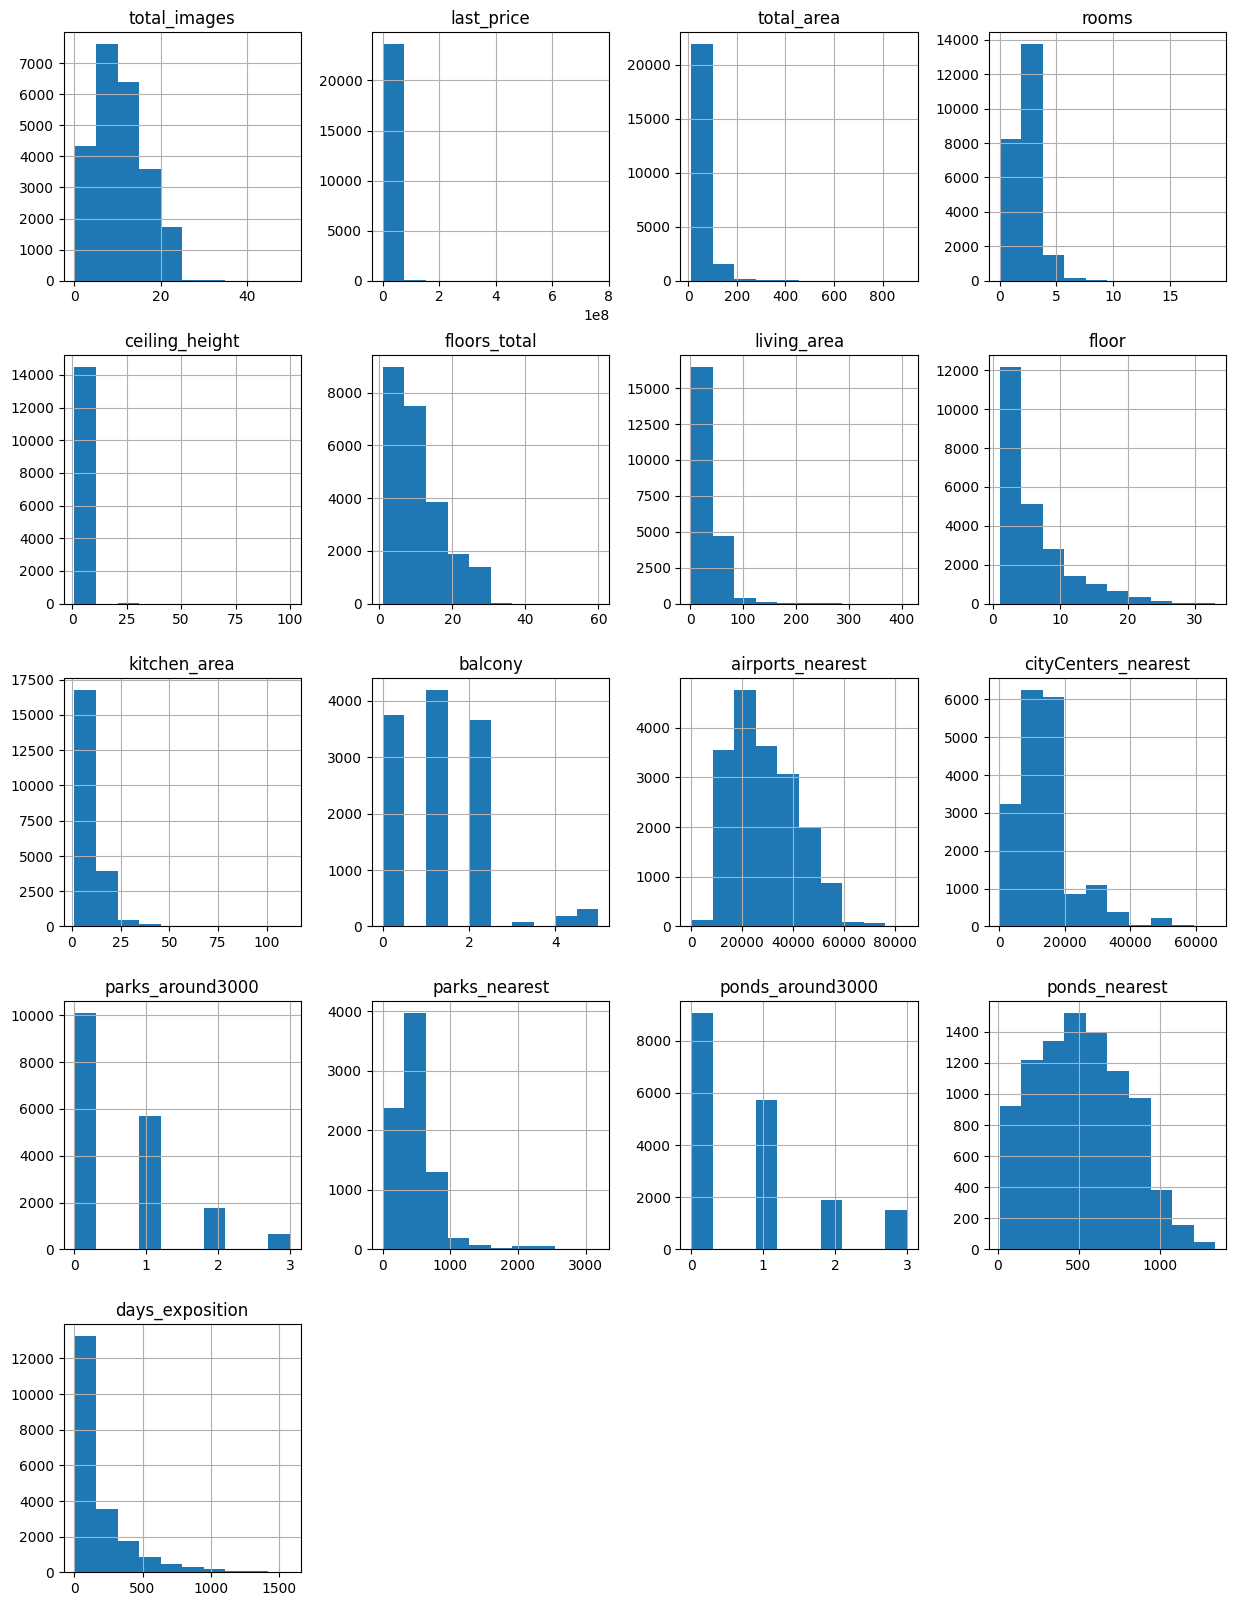

In [821]:
df.hist(figsize=(15, 20))
plt.show()

## 2. Предобраобтка данных

### 2.1. Стилистическая нормализация датафрейма

Как описывалось ранее, не все названия столбцов(полей) соответствуют "классическому" стилю оформления.

**Преобразования:**

`cityCenters_nearest` ⮕ `city_center_nearest`

`parks_around3000` ⮕ `parks_around_3000`

`ponds_around3000`⮕ `ponds_around_3000`

In [822]:
df = df.rename(columns={
    'cityCenters_nearest': 'city_centers_nearest',
    'parks_around3000': 'parks_around_3000',
    'ponds_around3000': 'ponds_around_3000'
})

### 2.2. Заполнение пропусков

**Общие причины появления пропусков**

1. Допущена ошибка в алгоритмах при создании выгрузки.
2. База данных могла быть "повреждена" намеренно в случае "саботажа" или случайно, например, из-за ошибки новичка.

*Перечисленные причины будут по умолчанию рассматриваться в каждом случае, если в ходе исследования не будет сказано обратного.*

Для удобста проверки заполнения данных создадим специальную функцию.

In [823]:
def pass_values_share(data: pd.core.series.Series) -> None:
    '''
        Функция определяет процент пропущенных значений в объекте Series.
    '''
    try:
        if (share := data.isna().mean() * 100) > 0:
            value = data.isna().sum()
            print('Пропущено {} значений. Это состовляет {}% от общего количества.'.format(value, round(share, 1)))
        else:
            print('Пропущенные значения отсутствуют (o^▽^o)')
    except:
        print('Ошибка функции (￢_￢;)')

Теперь определим в процентном отношение долю пропусков в каждом столбце с ними.

In [824]:
def pass_values_barh(data: pd.core.frame.DataFrame) -> None:
    '''
          Функция строит бар-диаграмму, отображающую долю пропущенных значений в столбцах с ними.
    '''
    try:
        (
            (data.isna().mean() * 100)
            .to_frame()
            .rename(columns={0: 'share'})
            .query('share > 0')
            .sort_values(by='share', ascending=True)
            .plot(kind='barh', figsize=(19, 6), fontsize=17, legend=False, grid=True)
            .set_title('Процент пропусков\n', fontsize=23, color='Purple')
        )
        plt.show()
    except:
        print('Пропуски отсутствуют (*¯︶¯*)')
        print('Либо ошибка в коде данной функции ＼(≧▽≦)／')

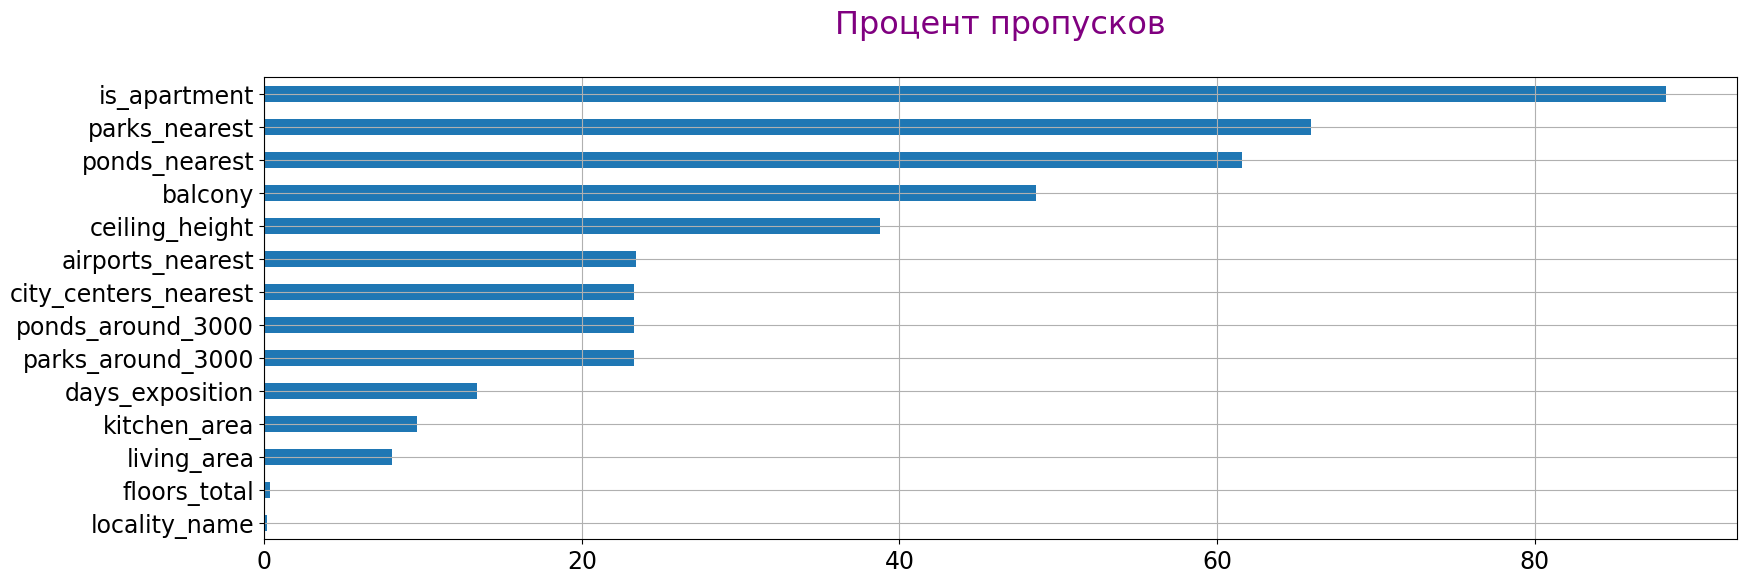

In [825]:
pass_values_barh(df)

***Чек-лист***

<div>✅ is_apartment<div/>
<div>✅ parks_nearest<div/>
<div>✅ ponds_nearest<div/>
<div>✅ balcony<div/>
<div>✅ ceiling_height<div/>
<div>✅ airports_nearest<div/>
<div>✅ city_centers_nearest<div/>
<div>✅ parks_around_3000<div/>
<div>✅ ponds_around_3000<div/>
<div>✅ days_exposition<div/>
<div>✅ kitchen_area<div/>
<div>✅ living_area<div/>
<div>✅ floors_total<div/>
<div>✅ locality_name<div/>

#### 2.2.1. is_apartment

В данном поле содержатся булевы значения. Рассмотрим их подробнее.

In [826]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Количество булевых значений сильно различается. Учитывая следующие факты: очень большая доля пропусков и невозможно восстановить значения, опираюся на другие поля. Чтобы не терять данные, заполним пропуски значением `False`. А так же выдвину ряд предположений о природе появления пропущенных значений в данном поле:

* Данное поле не заполняется автоматически и у него нет значения по умолчанию, поэтому пропуски возникают из-за не предоставления информации продавцом.

In [827]:
df['is_apartment'].fillna(False, inplace=True)
pass_values_share(df['is_apartment'])

Пропущенные значения отсутствуют (o^▽^o)


#### 2.2.2. parks_nearest

Перед построением графика определим максимальное и минимальное значения для задания корректного диапазона рассмотрения.

In [828]:
print('min =', df['parks_nearest'].min())
print('max =', df['parks_nearest'].max())

min = 1.0
max = 3190.0


В данном поле указано расстояние в метрах до ближайшего парка. Рассмотрим их подробнее.

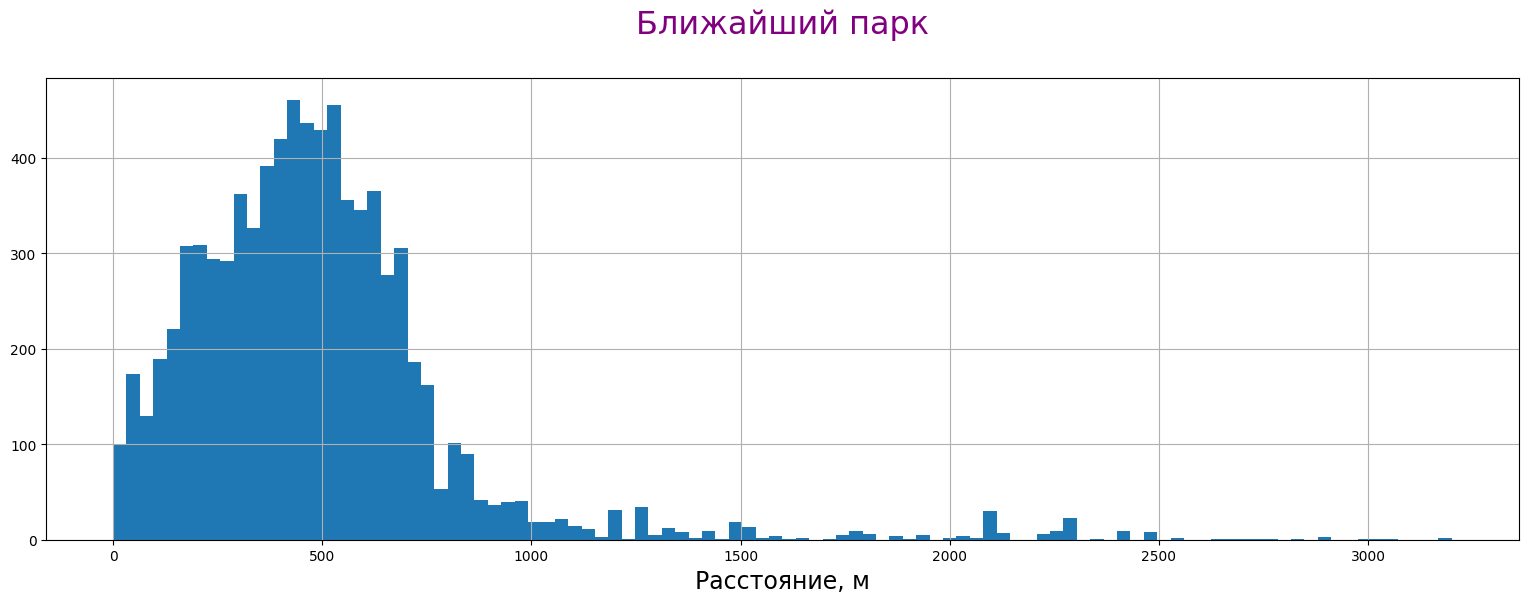

In [829]:
df.hist('parks_nearest', bins=100, range=(0, 3200), figsize=(19, 6))
plt.title('Ближайший парк\n', fontsize=23, color='Purple')
plt.xlabel('Расстояние, м', fontsize=17)
plt.show()

На графике изображено распределение Пуассона с пиком на расстояние 500 м и хвостом в сторону увеличения. Максимальное значение данного поля 3190. На этапе заполнения пропусков нас интересует максимальное значение, так как оно превышает 3000 м, поэтому можно точно сказать, что при нуле в поле `parks_around_3000` значение поля `parks_nearest` не обязательно должно отсутствовать.

Изучим значения поля `parks_around_3000` при пропуске в поле `parks_nearest`. Таким образом, поробуем сузить круг возможных причин пропусков в изучаемом поле и понять возможно ли их заполнить.

In [830]:
df.loc[df['parks_nearest'].isna(), 'parks_around_3000'].unique()

array([ 0., nan])

Теперь определим количество объектов, в которых не указаны оба выше упомянутых поля.

In [831]:
df[df['parks_nearest'].isna() & df['parks_around_3000'].isna()].shape[0]

5518

Исходя из приведённых выше данных, предположим, что пропуски возникли, 
* Так как поле `parks_nearest` заполняется автоматически и заполнено у всех объектов недвижимости с парками в радиусе 3000 метров (`parks_around_3000`), то причиной является настройка робота автоматического заполнения, например, указывать расстояние до парков в радиусе 4000 м.

Таким образом, под пропусками в поле `parks_nearest` будем подразумевать, что парк расположен слишком далеко от объекта недвижимости. Сохраняем пропуски.

#### 2.2.3. ponds_nearest

На графике изображено распределение Пуассона с пиком на расстояние 450 м и хвостом в сторону увеличения. Максимальное значение данного поля 1344 м. Проверим гипотезу о том, что `ponds_nearest` не указано только для объявлениях с `ponds_around_3000` равным нулю или во все неуказаным.

Изучим значения поля `ponds_around_3000` при пропуске в поле `ponds_nearest`. Таким образом, поробуем сузить круг возможных причин пропусков в изучаемом поле и понять возможно ли их заполнить.

In [832]:
df.loc[df['ponds_nearest'].isna(), 'ponds_around_3000'].unique()

array([ 0., nan])

Теперь определим количество объектов, в которых не указаны оба выше упомянутых поля.

In [833]:
df[df['ponds_nearest'].isna() & df['ponds_around_3000'].isna()].shape[0]

5518

Исходя из приведённых выше данных, предположим, что пропуски возникли, 
* Так как поле `ponds_nearest` заполняется автоматически и заполнено у всех объектов недвижимости с озёрами в радиусе 3000 метров (`ponds_around_3000`), то причиной является настройка робота автоматического заполнения, например, указывать расстояние до озёр в радиусе 4000 м.

Таким образом, в под пропусками в поле `ponds_nearest` будем подразумевать, что водоём расположен слишком далеко от объекта недвижимости. Сохраняем пропуски.

#### Связь "озёр и парков"

Исследование пропусков в предыдущих двух пунктах показало, что `parks_nearest` и `ponds_nearest` очень похожи сточки зрения связей с `parks_around_3000` и `ponds_around_3000` соответственно. Изучим эти поля.

Определим количество объявлений с отсутствующими данными сразу во всех 4 столбцах. Попарно для полей описывающих парки и озёра количество таких объявлений одинаково и равно 5518.

In [834]:
general_error = (
    df['ponds_nearest'].isna() &
    df['ponds_around_3000'].isna() &
    df['parks_nearest'].isna() &
    df['parks_around_3000'].isna()
)

df[general_error].shape[0]

5518

Определим количество и долю пропусков в `ponds_around_3000` и `parks_around_3000`. Это необходимо для формирования общего вывода.

In [835]:
pass_values_share(df['ponds_around_3000'])
pass_values_share(df['parks_around_3000'])

Пропущено 5518 значений. Это состовляет 23.3% от общего количества.
Пропущено 5518 значений. Это состовляет 23.3% от общего количества.


Предположение оказалось верным, связь между этими полями действительно существует. Общее количество объявлений с пропусками в полях `ponds_nearest`, `ponds_around_3000`, `parks_nearest`, `parks_around_3000` равно 5518. Это составляет 100% пропусков для полей `ponds_around_3000` и `parks_around_3000`.

Общие выводы:

1. Пропуски полей `ponds_nearest` и `parks_nearest` по происхождению разделены на два класса: `1` - ближайщий природный объект находится слишком далеко (предположительно, у робота автозаполнения есть радиус поиска, в котором ничего не было обнаружено), `2` - техническая ошибка. Пропускам в `ponds_nearest` и `parks_nearest` соответствуют значения: *0* для `1` и *NaN* для `2`.
2. Техническая ошибка, т.е. класс `2`, предположительно, имеет общую причину сразу для всех 4-х полей, причина описана выше. Стоит проверить связь этой ошибки и с другими полями.

#### 2.2.4. balcony

В этом поле указано количество балконов, следовательно его значения являются дискретными.

In [836]:
pass_values_share(df['balcony'])

Пропущено 11519 значений. Это состовляет 48.6% от общего количества.


Эти данные заполняются только вручную. На данный момент логичнее всео будет предположить, что причиной отсутствия некоторых значений является незаполнение их продовцами. Скорее всего продавци не всегда заполняют данное поле, если балконы отсутствуют. Однако, не стоит забывать про технические сбои.

Проверим гичетезу об общности ошибки сразу для несколькиз полей. Определим количество пропусков столбца `balcony`, соответствующих пропускам в `ponds_nearest`, `ponds_around_3000`, `parks_nearest`, `parks_around_3000`.

In [837]:
general_error &= df['balcony'].isna()

df[general_error].shape[0]

2710

Количество пропусков меньше, чем ожидалось. Сохраняем данные строки в переменной `general_error` и заменяем пропуски значение 0.

In [838]:
df['balcony'].fillna(0, inplace=True)
pass_values_share(df['balcony'])

Пропущенные значения отсутствуют (o^▽^o)


#### 2.2.5. locality_name

Данное поле содержит название населённого пункта, в котором распологается объект недвижимости. Получим общие сведения:

In [839]:
pass_values_share(df['locality_name'])

Пропущено 49 значений. Это состовляет 0.2% от общего количества.


In [840]:
pass_values_lclt_nm = df['locality_name'].isna()
# Поличум общую информацию
df[pass_values_lclt_nm].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 1097 to 23214
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          49 non-null     int64  
 1   last_price            49 non-null     float64
 2   total_area            49 non-null     float64
 3   first_day_exposition  49 non-null     object 
 4   rooms                 49 non-null     int64  
 5   ceiling_height        14 non-null     float64
 6   floors_total          48 non-null     float64
 7   living_area           44 non-null     float64
 8   floor                 49 non-null     int64  
 9   is_apartment          49 non-null     bool   
 10  studio                49 non-null     bool   
 11  open_plan             49 non-null     bool   
 12  kitchen_area          40 non-null     float64
 13  balcony               49 non-null     float64
 14  locality_name         0 non-null      object 
 15  airports_nearest   

In [841]:
# Рассмотрим несколько примеров
df[pass_values_lclt_nm]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,False,...,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,NaN,4.0,42.60,2,False,...,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,False,...,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,False,...,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,NaN,5.0,30.80,5,False,...,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,False,...,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,...,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,NaN,7.0,NaN,6,False,...,NaN,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,NaN,7.0,59.10,5,False,...,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,NaN,24.0,20.00,23,False,...,NaN,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


Данные объявлений с пропусками в поле `locality_name` разнообразны и не содержат явных характеристик, позволяющих  их объеденить. На данный момент не возможно с достаточной точностью определить населённый пункт данных объявлений. Чтобы избежать потери данных, введём новое значение для данного столбца `"Unknown"` и заполним им пропуски.

In [842]:
df['locality_name'].fillna('Unknown', inplace=True)
# Check
pass_values_share(df['locality_name'])

Пропущенные значения отсутствуют (o^▽^o)


**Вывод:** пропуски в поле `locality_name` были обнаружены всего в **49** объявлениях, данные которых разнообразны и не содержат объединяющей закономерности. Чтобы не потерять данные, была произведено заполение пропусков новым значением `Unknown`. Вероятными *причинами пропусков* могут быть: технические ошибки в алгоритмах или отсутствие названия населённого пункта, вседстие чего название не было указано намеренно, однако это возможно при особых объстоятельствах, в том числе необязательном заполнение этого значения.

#### * 2.3.1. Обработка дубликатов поля `locality_name`

В последующей обработке пропусков поле `locality_name` необходимо для `группировки данных`(например, медианна высоты потолков по населённым пунктам), поэтому для повышения точности статистик необходимо исключить возможность неявного дублирования в названиях.

In [843]:
# Считаем количество уникальных наименований населённых пунктов
print(
    'Количество уникальных наименований населённых пунктов:',
    df['locality_name'].nunique()
)

Количество уникальных наименований населённых пунктов: 365


Рассмотрим этих наименований:

In [844]:
unique_locality_names = df['locality_name'].unique()
unique_locality_names.sort()
unique_locality_names

array(['Unknown', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'город

Для устранения неявных дубликатов исключим все спец символы и упростим многословные названия.

In [845]:
# Словарь с лексическими упрощениями наименований
replace_dict = {
    'городской поселок': 'посёлок',
    'городской посёлок': 'посёлок',
    'коттеджный поселок': 'посёлок',
    'коттеджный посёлок': 'посёлок',
    'поселок городского типа': 'посёлок',
    'посёлок городского типа': 'посёлок',
    'посёлок при железнодорожной станции': 'посёлок',
    'поселок станции': 'посёлок',
    'поселок': 'посёлок',
    'садоводческое некоммерческое товарищество': 'СНТ',
    'садовое товарищество': 'СНТ'
}

In [846]:
# # Эффективно устраняет this '&av&&@av' -> ' av   av'
# def smart_replace(word: str, search_obj: str, replacement: str) -> str:
#     word_sz = len(word)
#     search_obj_sz = len(search_obj)
#     replacement_sz = len(replacement)

#     if word_sz < search_obj_sz:
#         return

#     if search_obj_sz in replacement_sz:
#         return

#     pure_word = ''
    

In [847]:
# Проверяет является ли символ русской буквой
def is_rus_letter(letter: str) -> bool:
    return None if len(letter) != 1 else ('А' <= letter <= 'п' or 'р' <= letter <= 'ё')

In [848]:
# Заменяет все символы неудовлетворяющие функции-проверки (logic) на пробелы
# def grand_replace(text: str, replacement: str, logic: function) -> str:
def grand_replace(text: str, replacement: str, logic) -> str:
    pure_text = ''
    for smbl in text:
        pure_text += replacement if not logic(smbl) else smbl.lower()
    return pure_text

In [849]:
# Преобразует список в строку
def sum_str_array(words: list[str, ]) -> str:
    word = ''
    for sub_word in words:
        word += sub_word
    return word

In [850]:
# Искллючает из слов все спец символы, исключение `Unknown`
def replace_invalid_chars(name: str) -> str:
    if name == 'Unknown':
        return name

    name = grand_replace(name, ' ', is_rus_letter).split()
    if not len(name):
        return None

    pure_name = name[0]
    for word in name[1:len(name)]:
        pure_name += ' '
        pure_name += sum_str_array([sub_word.strip() for sub_word in word.split()])

    return pure_name

In [851]:
# Заменяет слово на соответствующее согласно `replace_dict`
def shorten_name(name: str) -> str:
    for key, value in replace_dict.items():
        name = name.replace(key, value)
        
    return name

In [852]:
df['locality_name'] = df['locality_name'].apply(replace_invalid_chars).apply(shorten_name)
# Считаем количество уникальных наименований населённых пунктов
print(
    'Количество уникальных наименований населённых пунктов:',
    df['locality_name'].nunique()
)

Количество уникальных наименований населённых пунктов: 320


**Вывод:** изначальное количество уникальных названий `365`. После устранения спец символов, приведения к нижнему регистру и упрощения многословных наименований их стало `320`. Предположительно и наиболее вероятной является различный ввод одного наименования пользователями.

#### 2.2.6. ceiling_height

В данном поле указана высота потолков в метрах. Рассмотрим данное поле подробнее:

In [853]:
pass_values_share(df['ceiling_height'])

Пропущено 9195 значений. Это состовляет 38.8% от общего количества.


Статистическая информация о рассматриваемом поле:

In [854]:
ch_primary_stat = (
    df['ceiling_height']
    .describe()
    .to_frame()
    .rename(columns={'ceiling_height': 'value'})
)
ch_primary_stat

,value
count,14504.000000
mean,2.771499
std,1.261056
min,1.000000
25%,2.520000
50%,2.650000
75%,2.800000
max,100.000000


Эта информация необходима для отслеживания изменения статистик: среднее, медианное, стандартное отклонение, после заполнения пропусков. Не сложно заметить, что в некоторых объявлениях указана слишком маленькая высота потолков. По текущим стандартам минимальной для Ленинградской области является высота потолков в *2.7* метра, но для домов застройки прошлого века это правило не действительно. Например, для "хрущёвок" был стандарт в *2,48* метра. По статистикам видна, что доля данных не удовлетворяют такому минимуму. Изучим эти объявления подробнее.

In [855]:
few_ch = df['ceiling_height'] < 2.48

# Вывожу общую информацию об обхявлениях с потолками ниже 2.48 м
print('Кол-во объявлений с потолками ниже 2.48 м:', few_ch.sum())
share_na_in_few_ch = df[few_ch].isna().sum()
print('\n    Количество пропусков')
share_na_in_few_ch[share_na_in_few_ch > 0].sort_values(ascending=False)

Кол-во объявлений с потолками ниже 2.48 м: 64

    Количество пропусков


ponds_nearest           48
parks_nearest           44
airports_nearest        31
city_centers_nearest    31
parks_around_3000       31
ponds_around_3000       31
days_exposition          9
kitchen_area             7
living_area              6
dtype: int64

In [856]:
# Вывожу 10 объявлений со слишком низкими потолками
df[few_ch].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
193,6,7920000.0,83.8,2017-08-17T00:00:00,4,2.47,9.0,55.9,9,False,...,9.8,1.0,санкт петербург,30352.0,7724.0,0.0,NaN,1.0,289.0,155.0
227,13,2200000.0,47.0,2018-01-12T00:00:00,3,2.34,5.0,NaN,1,False,...,NaN,0.0,посёлок новый свет,NaN,NaN,NaN,NaN,NaN,NaN,45.0
552,11,2999000.0,33.5,2017-03-30T00:00:00,1,2.00,15.0,17.5,6,False,...,6.5,0.0,санкт петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
632,20,3350000.0,35.0,2017-11-14T00:00:00,2,2.45,9.0,21.0,9,False,...,6.0,2.0,посёлок кузьмоловский,NaN,NaN,NaN,NaN,NaN,NaN,NaN
987,12,7100000.0,65.5,2016-03-30T00:00:00,4,2.46,5.0,51.0,4,False,...,9.4,0.0,санкт петербург,24542.0,5110.0,1.0,572.0,0.0,NaN,82.0
1078,8,5450000.0,59.5,2018-05-07T00:00:00,3,2.45,9.0,38.4,6,False,...,5.7,2.0,санкт петербург,45341.0,16603.0,1.0,675.0,0.0,NaN,173.0
1322,16,6000000.0,55.0,2019-04-11T00:00:00,3,2.40,5.0,30.0,1,False,...,15.0,0.0,пушкин,14234.0,26388.0,0.0,NaN,0.0,NaN,NaN
1582,4,4100000.0,45.6,2016-01-13T00:00:00,2,2.30,9.0,28.4,8,False,...,7.0,2.0,санкт петербург,49152.0,14977.0,1.0,489.0,1.0,525.0,329.0
2236,2,2400000.0,63.6,2018-03-21T00:00:00,4,2.40,5.0,49.0,2,False,...,8.0,1.0,новая ладога,NaN,NaN,NaN,NaN,NaN,NaN,45.0
2572,4,2400000.0,62.0,2018-12-27T00:00:00,3,2.00,5.0,40.0,4,False,...,6.0,1.0,луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [857]:
ch_just_median_fill_stat = (
    df['ceiling_height']
    .fillna(
        df['ceiling_height']
        .median()
    )
    .describe()
    .to_frame()
    .rename(columns={'ceiling_height': 'value'})
)
ch_just_median_fill_stat

,value
count,23699.000000
mean,2.724358
std,0.988298
min,1.000000
25%,2.600000
50%,2.650000
75%,2.700000
max,100.000000


Объявлений о продаже недвижимости с потолками ниже **2.48 м** всего 64. Это немного относительно все выборки. Так же стоит отметить, что объявления не имеют общего аномального параметра, срок продажи от нескольких дней до нескольких месяцев, разное количество комнат и тд. Учитывая все эти факты эти аномалии вероятно они будут удалены из выборки на этами нормализации данных.

Вернёмся к устранению пропусков. Заполним пропуски, чтобы не потерять *39%* данных. Будем использовать медиану, чтобы избежать воздействия аномально больших или малых значений. Определим её из групп сформированных по наименованию населённого пункта.

**Гипотеза:** заполнение пропусков медианой, найденной для каждого населённого пункта, позволит учесть особенности застройки и сохранить статистики.

**Критерий проверки:** менее значительное именение статистик, чем при взятии медианы просто от группы.

<div class="alert alert-warning">
    <font size="3"><b>⚠️ Дополнить</b></font>
    <br /> 
    <font size="2", color = "black">
        <br />
        Проверить гипотезу о зависимости высоты потолков от удалённости от центра населённого пункта `locality_name`
        <br />
    </font>

</div>

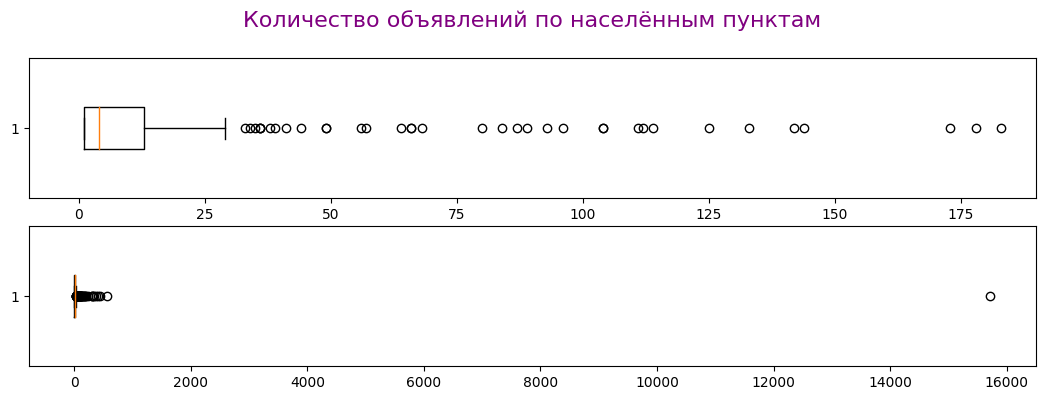

In [858]:
# Определим и визуализируем количество объявлений в каждом населённом пункте
sup_data = (
    df['locality_name']
    .value_counts()
    .to_frame()
    .rename(columns={'locality_name': 'value'})
)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 4))

ax1.boxplot(
    sup_data,
    vert=False,
    widths=0.3
)
ax1.set_xlim([-10, 190])
ax1.set_title('Количество объявлений по населённым пунктам\n', fontsize=16, color='Purple')

ax2.boxplot(
    sup_data,
    vert=False,
    widths=0.3
)

plt.show()

In [859]:
sup_data.describe()

,value
count,320.000000
mean,74.059375
std,879.992711
min,1.000000
25%,1.000000
50%,4.000000
75%,13.000000
max,15721.000000


По графикам и описанию видно, что `более 75%` населённых пунктов насчитывают `менее 15` объявлений. Стоит заметить, что взятие медианы для "малочисленных" населённых пунктов скорее всего не будет иметь смысла, так как данных будет слишком мало. Следовательно велик шанс преумножить `аномалии`. Так же учтём, что для населённых пунктов насчитывающих всего `1` объявление и оно с пропуском в изучаемом поле `не получится` взять медину.

**Скорректируем гипотезу.** Более 75% населённых пунктов содержат менее 13 объявлений. Чтобы оценка была точнее и уменьшить влияние аномалий, а также заполнить пропуски в поселениях с 1 населённым пунктом, будем брать медианное значение только в населённых пунктах, содежращих не менее 100 объявлений. Такой подход поможет лучше сохранить исходные статискими и заполнить все пропуски.

In [860]:
# Копируем одноимённые поля исходного датафрейма
ch_df = df.loc[:, ['locality_name', 'ceiling_height']].copy()

In [861]:
def fill_na_by_group(data, by: str, values: str, aggfunc: str):
    '''
        Группирует data по by, вычисляет статистику aggfunc по значениям values.
        Заполняет пропуски поля by статистикой соответстующей группы.
    '''
    for name, value in data.pivot_table(index=by, values=values, aggfunc=aggfunc).iterrows():
        data.loc[
            (data[values].isna()) &\
            (data[by] == name),
            values
        ] = value[0]

In [862]:
# Список населённых пунктов, с количеством объявлений не превыщающим 100
cities_with_few_ads = sup_data.query('value < 100').index

In [863]:
# Заполнение медианой по населённым пунктам с количеством объявлений не менее 100
for name, values in df.pivot_table(index='locality_name', values='ceiling_height', aggfunc='median').iterrows():
    if name not in cities_with_few_ads:
        df.loc[
            (df['ceiling_height'].isna()) &\
            (df['locality_name'] == name),
            'ceiling_height'
        ] = values[0]
print('\tЭтап 1 ✅')
pass_values_share(df['ceiling_height'])

interim_median = df['ceiling_height'].median()
# Заполнение медианой оставшихся пропусков
df['ceiling_height'].fillna(interim_median, inplace=True)
print('\tЭтап 2 ✅')
print('Заполняющее значение:', interim_median)
pass_values_share(df['ceiling_height'])

	Этап 1 ✅
Пропущено 1214 значений. Это состовляет 5.1% от общего количества.
	Этап 2 ✅
Заполняющее значение: 2.7
Пропущенные значения отсутствуют (o^▽^o)


In [864]:
ch_city_group_stat = (
    df['ceiling_height']
    .describe()
    .to_frame()
    .rename(columns={'ceiling_height': 'value'})
)

In [865]:
(
    ch_primary_stat
    .join(
        ch_just_median_fill_stat,
        lsuffix='_x',
        rsuffix='_y'
    )
    .join(
        ch_city_group_stat
    )
    .rename(
        columns={
            'value_x': 'До',
            'value_y': 'Общая медиана',
            'value': 'Медиана по областям'
        }
    )
)

,До,Общая медиана,Медиана по областям
count,14504.000000,23699.000000,23699.000000
mean,2.771499,2.724358,2.736126
std,1.261056,0.988298,0.988063
min,1.000000,1.000000,1.000000
25%,2.520000,2.600000,2.580000
50%,2.650000,2.650000,2.700000
75%,2.800000,2.700000,2.700000
max,100.000000,100.000000,100.000000


**Вывод**

На основании предоставленной информации, видно что `среднее значение`, `стандартное отклонение`, `первый и четвёрый квартили` после изменений немного снизились в обоих случаях.

На данный момент разница статистик обоих подходов незначительна. Гипотеза подтверждена от части. Ведь, судяВоспользуемся `медианой по области`. *Не зря ведь вычислял...*

**Микровывод:** выдвигать интересные гипотезы - это полезно и эффективно, но необходимо заранее лучше взвешивать за и против. Например, проверять по мере усложнения до появления удовлетворяющего результата. Краткость - сестра таланта.

С учётом того абстоятельства, что в первоначальных данных по этому столбцу отсутствовало `38,8%`, то изменение статистик небольшое.

В ходе исследования было обнаружено незначительное количество аномалий: слишком низкие и слишком высокие. Стандарт высоты потолков современной застройки 2.7 м, "хрущёвской" - 2.48. Аномальных значений обнаружено незначительное количество `64`. Однако неоднородность высот была учтена при заполнение и использовалось медианное значение.

#### 2.2.7. airports_nearest

В данном поле в метрах указано расстояние до ближайшего аэропорта. Изучим данные подробнее:

In [866]:
pass_values_share(df['airports_nearest'])

Пропущено 5542 значений. Это состовляет 23.4% от общего количества.


In [867]:
# Выводим статистики
df['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Опираясь на `среднее` и `медианное` значения, делаем вывод, что распределение велечин имеет небольшую положительную скошенность, т.е. отличается от нормального "дополнительными" данными справа.

Заполним пропущенные значения медианой по населённым пунктам. Исключением будет являтся `санкт петербург`, так как он является крупным городом с несколькими аэропортами, иначе в дальнейшем могут появится большие погрешности в анализе. Однако, не только в Петербурге останутся пустые поля. В населённых пунктах с 1 объявлением и `Unknown` так же будут пропуски, так как для них нельзя определить это значение по исходным данным, а заполнение общей медианой скорее всего приведёт к погрешностям в анализе.

In [868]:
def fill_na_median_by_name(
    data,
    value: str,
    excluded_names: list[str, ] = ['']
):
    # Заполняем медианами пропуски
    median_by_name = (
        data
        .pivot_table(
            index='locality_name',
            values='airports_nearest',
            aggfunc='median'
        )
    )
    
    for name, values in median_by_name.iterrows():
        if name not in excluded_names:
            data.loc[
                (data['locality_name'] == name) &\
                (data['airports_nearest'].isna()),
                'airports_nearest'
            ] = values[0]
    
    # Check
    pass_values_share(data['airports_nearest'])

In [869]:
fill_na_median_by_name(df, 'airports_nearest', ['санкт петербург', 'Unknown'])

Пропущено 4957 значений. Это состовляет 20.9% от общего количества.


**Вывод:** оставшиеся пропуски заполнять не будем, так как это может привести к большим погрешностям в анализе.

#### 2.2.8. city_centers_nearest

В этом поле указано расстояние до центра населённого пункта. Изучим данные подробнее:

In [870]:
pass_values_share(df['city_centers_nearest'])

Пропущено 5519 значений. Это состовляет 23.3% от общего количества.


Заполним пропуски медианами по населённым пунктам с более чем 1 объявлением. Исключениями будут являтся с наименованием`Unknown`.

In [871]:
# Заполняем медианами пропуски
fill_na_median_by_name(df, 'city_centers_nearest', ['Unknown'])

Пропущено 4872 значений. Это состовляет 20.6% от общего количества.


**Вывод:** оставшиеся пропуски заполнять не будем, так как это может привести к большим погрешностям в анализе.

#### 2.2.9. ponds_around_3000

В этом поле указано количество озёр к радиусе 3000 метров от выставленного объекта недвижимости. Изучим данные подробнее:

In [872]:
pass_values_share(df['ponds_around_3000'])

Пропущено 5518 значений. Это состовляет 23.3% от общего количества.


Учитывая исследования из пунктов `2.2.2`, `2.2.3` и `"Связь озёр и парков"` корректнее будет предположить, что все пропуски в данном поле появились по причине сбоя программы или намеренного/случайного искажения. Так как в каждом объявление с пропусками в этом поле отсутствуют данные в полях `ponds_nearest`, `parks_around_3000` и `parks_nearest`. При этом количество пропусков с полем `parks_around_3000` одинаково.

Возможными причинами пропусков являются:

* Сбой робота, собирающего данные
* Искажение данных, сотрудниками допущенными к общей БД

Для данного поля будем исходить из предположения, что значения не восстановить по исходным данным и это поле не будет иметь высокой корреляции со стоимостью объекта недвижимости. Заполним пропуски значением `0`.

In [873]:
df['ponds_around_3000'].fillna(0, inplace=True)
# check
pass_values_share(df['ponds_around_3000'])

Пропущенные значения отсутствуют (o^▽^o)


**Вывод:** исходя из следующих предположений: пропуски данного поля имеют технические причины возникновения и значения не будут иметь значительной корреляции. Было принято решение заполнить пропущенные данные значением `0`.

#### 2.2.10. parks_around_3000

В этом поле указано количество парков к радиусе 3000 метров от выставленного объекта недвижимости. Изучим данные подробнее:

In [874]:
pass_values_share(df['parks_around_3000'])

Пропущено 5518 значений. Это состовляет 23.3% от общего количества.


Учитывая исследования из пунктов `2.2.2`, `2.2.3` и `"Связь озёр и парков"` корректнее будет предположить, что все пропуски в данном поле появились по причине сбоя программы или намеренного/случайного искажения. Так как в каждом объявление с пропусками в этом поле отсутствуют данные в полях `ponds_nearest`, `ponds_around_3000` и `parks_nearest`. При этом количество пропусков с полем `ponds_around_3000` одинаково.

Возможными причинами пропусков являются:

* Сбой робота, собирающего данные
* Искажение данных, сотрудниками допущенными к общей БД

Для данного поля будем исходить из предположения, что значения не восстановить по исходным данным и это поле не будет иметь высокой корреляции со стоимостью объекта недвижимости. Заполним пропуски значением `0`.

In [875]:
df['parks_around_3000'].fillna(0, inplace=True)
# check
pass_values_share(df['parks_around_3000'])

Пропущенные значения отсутствуют (o^▽^o)


**Вывод:** исходя из следующих предположений: пропуски данного поля имеют технические причины возникновения и значения не будут иметь значительной корреляции. Было принято решение заполнить пропущенные данные значением `0`.

#### 2.2.11. days_exposition

В данном поле указано количество дней от выставления объявления до даты продажи. Изучим данные подробнее:

In [876]:
pass_values_share(df['days_exposition'])

Пропущено 3181 значений. Это состовляет 13.4% от общего количества.


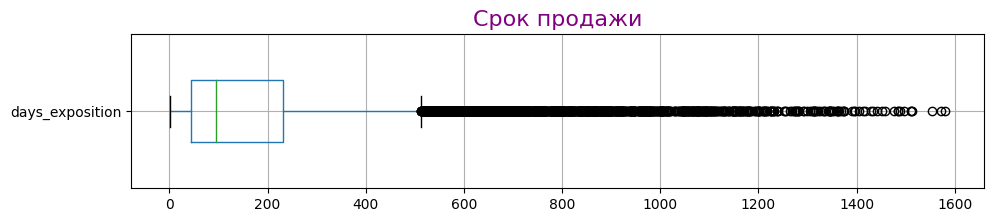

In [877]:
df.boxplot(
    'days_exposition',
    vert=False,
    widths=0.4,
    figsize=(11, 2)
)
plt.title('Срок продажи', fontsize=16, color='Purple')
plt.show()

In [878]:
df.loc[df['days_exposition'].isna()].head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,False,...,25.0,0.0,санкт петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.7,24.0,NaN,22,False,...,18.9,2.0,санкт петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.7,22.0,NaN,3,False,...,NaN,1.0,санкт петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN


Распределение данных отлично от нормального, наблюдается высокая положительная скошенность: при медиане на `100` равномерно распределены данные до `1550`. Вероятными причинами появления данных пропусков являются:

* Сбой робота, собирающего данные
* Искажение данных сотрудниками, допущенными к БД
* Объявления на момент создания БД являются актуальными
* Продавец не снял объявление

**Вывод:** такие значения не возможно корректно определить по остальным данным, поэтому оставим пропуски.

#### 2.2.12.1. kitchen_area

В этом поле указана площадь кухни в $м^2$. Рассмотрим значения подробнее:

In [879]:
pass_values_share(df['kitchen_area'])

Пропущено 2278 значений. Это состовляет 9.6% от общего количества.


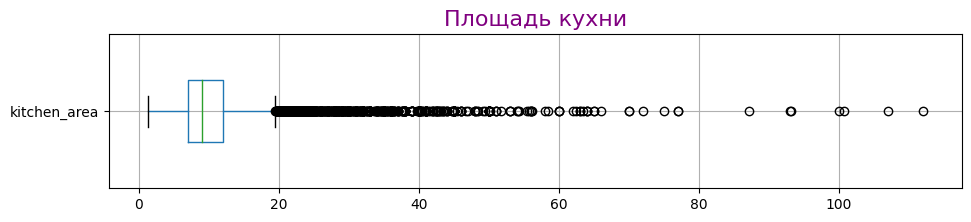

In [880]:
df.boxplot(
    'kitchen_area',
    vert=False,
    widths=0.4,
    figsize=(11, 2)
)
plt.title('Площадь кухни', fontsize=16, color='Purple')
plt.show()

На распределение данных видная небольшая положительная скошенность.

Добавим новое поле, в котором высчитаем отношение `площади кухни` к `общей площади`. Таким образом мы высчитаем медианный коэффициент отношения, с помощью которого заполним пропуски.

In [881]:
df['share_kitchen_area'] = df['kitchen_area'] / df['total_area']

Отследим изменение статистик для полю `share_kitchen_area` после заполнения пропусков медианой.

In [882]:
# Вывод статистик до заполнения общей мединой
df['share_kitchen_area'].describe()

count    21421.000000
mean         0.187355
std          0.072968
min          0.025381
25%          0.133333
50%          0.172414
75%          0.232416
max          0.787879
Name: share_kitchen_area, dtype: float64

In [883]:
# Заполнение пропусков общей медианой
test1_share_kitchen_area = df['share_kitchen_area'].fillna(df['share_kitchen_area'].median())

In [884]:
# Вывод статистик после заполнения общей мединой
test1_share_kitchen_area.describe()

count    23699.000000
mean         0.185919
std          0.069512
min          0.025381
25%          0.136859
50%          0.172414
75%          0.223717
max          0.787879
Name: share_kitchen_area, dtype: float64

Статистики не понесли больших изменений. Однако, такой метод заполнения не предусматривает факта, что сумма `площади кухни` и `жилой площади` должны быть не больше `общей площади`. Перед корректировкой на это проверим статистическую зависимость `площади кухни` после заполнения синтетическими данными и `общей площади`.

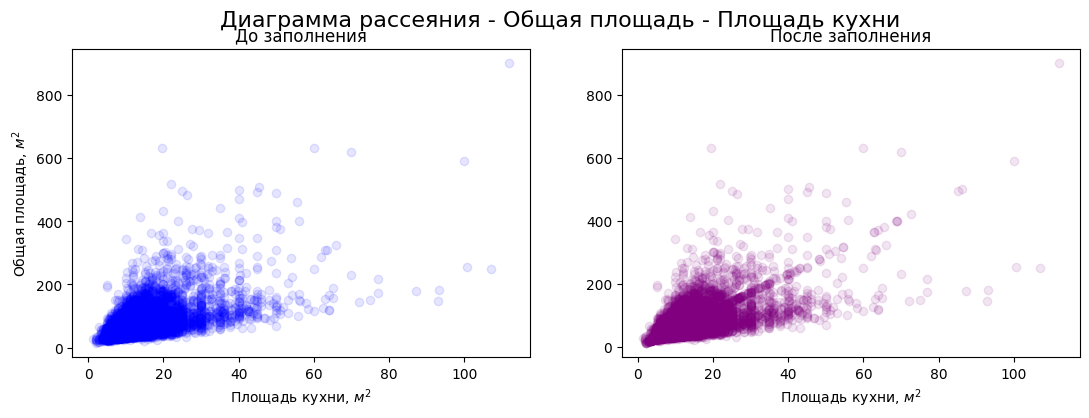

In [885]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

ax1.scatter(
    x=df['kitchen_area'],
    y=df['total_area'],
    alpha=0.1,
    color='blue'
)
ax1.set_title('До заполнения')
ax1.set_xlabel('Площадь кухни, $м^2$')
ax1.set_ylabel('Общая площадь, $м^2$')

ax2.scatter(
    x=(
        df['kitchen_area']
        .fillna(df['total_area'] * test1_share_kitchen_area)
    ),
    y=df['total_area'],
    alpha=0.1,
    color='purple'
)
ax2.set_title('После заполнения')
ax2.set_xlabel('Площадь кухни, $м^2$')

fig.suptitle('Диаграмма рассеяния - Общая площадь - Площадь кухни', fontsize=16)
plt.show()

На графике справа отчётливо видна ровная прямая из синтетических данных. Такие данные выглядят неестественно и сильно выбиваются из общей массы. Они показывают прямую корреляционную зависимость, что может привезти к ошибкам в дальнейшем анализе. В такой формулировке гипотеза потерпела неудачу.

**Гипотеза:** определение коэффициента отношения `площади кухни` к `общей площади` как медианы от сгруппированных по количеству комнат объявлений. Таким образом данные будут выглядеть естественнее на диаграмме рассеяния.

In [886]:
def get_med_notNaN_NaN_group(index: str, values: str):
    median_count = (
        df
        .pivot_table(
            index=index,
            values=values,
            aggfunc=['median', 'count']
        )
    )
    median_count.columns = ['median', 'not NaN']
    median_count['NaN'] = (
        df
        .loc[
            df[values].isna(),
            index
        ]
        .value_counts()
    )
    median_count['NaN'] = median_count['NaN'].fillna(0).astype('int')
    
    display(median_count)

In [887]:
# Медиана, количество с пропусками и без `площади кухни` сгруппированной по `количеству комнат`
get_med_notNaN_NaN_group('rooms', 'share_kitchen_area')

,median,not NaN,NaN
rooms,,,
0,NaN,0,197
1,0.247839,7213,834
2,0.161075,7286,654
3,0.128571,5380,434
4,0.112245,1081,99
5,0.105386,285,41
6,0.099502,97,8
7,0.083717,52,7
8,0.109170,9,3


В поле `rooms` (количество комнат) присутствует аномальное значение `0`. Все объявления с таким значением содержат пропуски в поле `kitchen_area`. Необходимо провести исследование таких значений, чтобы понять можно ли применить текущую гипотезу к таких объявлениям.

#### 2.3.2.2. Устранение аномалий `rooms`

In [888]:
# Количество пропусков в других полях
rooms_zero = df.query('rooms == 0')
rooms_zero.isna().sum().sort_values(ascending=False)

share_kitchen_area      197
kitchen_area            197
parks_nearest           168
ponds_nearest           128
city_centers_nearest     79
airports_nearest         51
days_exposition          14
living_area              14
floors_total              3
balcony                   0
ponds_around_3000         0
parks_around_3000         0
locality_name             0
total_images              0
last_price                0
studio                    0
is_apartment              0
floor                     0
ceiling_height            0
rooms                     0
first_day_exposition      0
total_area                0
open_plan                 0
dtype: int64

In [889]:
# Рассмотрим распределение количества комнат по студиям
df.query('studio == True')['rooms'].value_counts()

0    138
1     11
Name: rooms, dtype: int64

In [890]:
print(
    'Кол-во пропусков `kitchen_area` в "бескомнатных" студиях:',
    sum(df.query('studio == True & rooms == 0')['kitchen_area'].isna())
)
print(
    'Кол-во пропусков `kitchen_area` в однокомнатных студиях:',
    sum(df.query('studio == True & rooms == 1')['kitchen_area'].isna())
)

Кол-во пропусков `kitchen_area` в "бескомнатных" студиях: 138
Кол-во пропусков `kitchen_area` в однокомнатных студиях: 11


**Промежуточные выводы:**

* В поле `rooms` для квартир студий указано только 2 значения: `1` и `0`.
* У всех "студий" `пропуск` в поле `kitchen_area`.
* Все объекты с `0` в `rooms` имеют пропуск в `kitchen_area`, однако `living_area` указана почти во всех.

Вероятно, что при внесение информации о продоваемой кравтире студии большинство продавцов предпочитают указать `нулевое` количество комнат.

In [891]:
# Пропуски в полях нулькомнатных квартир, не являющихся студиями
rz_not_studio = rooms_zero.query('studio == False').isna().sum().sort_values(ascending=False)
rz_not_studio = rz_not_studio[rz_not_studio > 0]
rz_not_studio

share_kitchen_area      59
kitchen_area            59
parks_nearest           50
ponds_nearest           38
city_centers_nearest    28
airports_nearest        21
living_area              4
dtype: int64

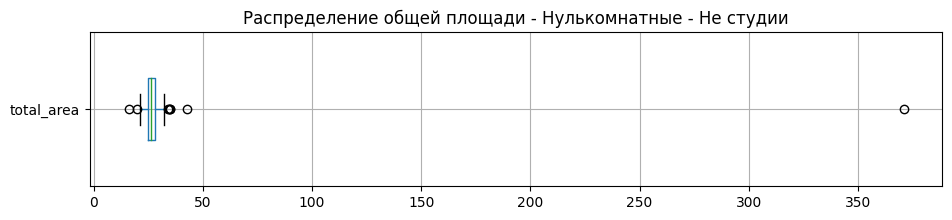

In [892]:
# Нулькомнатные квартиры - Не студии - Распределение общих площадей
(
    rooms_zero
    .query('studio == False')
    .boxplot(
        'total_area',
        vert=False,
        figsize=(11, 2),
        widths=0.4
    )
)
plt.title('Распределение общей площади - Нулькомнатные - Не студии')
plt.show()

In [893]:
# Нулькомнатная квартира - не студия
for name, value in rooms_zero.query('studio == False & total_area > 350').items():
    print(f'{name}: {value[19392]}')

total_images: 5
last_price: 71000000.0
total_area: 371.0
first_day_exposition: 2018-07-26T00:00:00
rooms: 0
ceiling_height: 3.57
floors_total: 7.0
living_area: nan
floor: 6
is_apartment: False
studio: False
open_plan: True
kitchen_area: nan
balcony: 0.0
locality_name: санкт петербург
airports_nearest: 25257.0
city_centers_nearest: 6060.0
parks_around_3000: 1.0
parks_nearest: 761.0
ponds_around_3000: 1.0
ponds_nearest: 584.0
days_exposition: 90.00000000000001
share_kitchen_area: nan


In [894]:
# Основные статистики об общей площади по количеству комнат
total_area_allocation_by_rooms = (
    df.pivot_table(index='rooms', values='total_area', aggfunc=['min', 'median', 'max', 'count'])
)
total_area_allocation_by_rooms.columns = ['min', 'median', 'max', 'count']
total_area_allocation_by_rooms

,min,median,max,count
rooms,,,,
0,15.5,26.05,371.0,197
1,12.0,36.56,494.1,8047
2,20.0,53.00,196.0,7940
3,40.1,73.00,363.1,5814
4,42.0,99.30,500.0,1180
5,40.0,146.45,507.0,326
6,87.0,184.30,500.0,105
7,100.6,214.00,631.2,59
8,150.0,235.70,373.1,12


`Нулькомнатные` квартиры, не являющиеся студиями переместим в класс `однокомнатных`. Относительно аномалии с `общей площадью` в `371` $м^2$ принимаем решение перевода в класс `четырёхкомнатные`. Таким образом данные будут выглядеть правдопадобнее, и сохранится информация.

In [895]:
# Перевод в класс "четырёхкомнатные"
df.loc[
    (df['rooms'] == 0) &\
    (~df['studio']) &\
    (df['total_area'] == 371),
    'rooms'
] = 4

# Перевод в класс однокомнатные
df.loc[
    (df['rooms'] == 0) &\
    (~df['studio']),
    'rooms'
] = 1

# Обновление данных в `rooms_zero`
rooms_zero = df.query('rooms == 0')

Теперь изучим распределение `площадей кухни` среди `нулькомнатных` и `однокомнатных` студий.

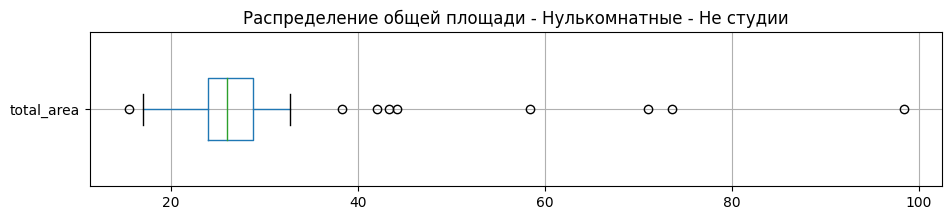

In [896]:
# Нулькомнатные квартиры - Студии - Распределение общих площадей
(
    rooms_zero
    .boxplot(
        'total_area',
        vert=False,
        figsize=(11, 2),
        widths=0.4
    )
)
plt.title('Распределение общей площади - Нулькомнатные - Не студии')
plt.show()

In [897]:
print('Количество нулькомнатных студий:', rooms_zero.shape[0])

Количество нулькомнатных студий: 138


In [898]:
# Однокомнатные квартиры - Студии
df.query('studio & rooms == 1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,share_kitchen_area
2389,5,2250000.0,25.41,2016-06-07T00:00:00,1,2.70,12.0,17.08,8,False,...,2.0,санкт петербург,14125.0,12921.0,2.0,328.0,2.0,485.0,26.0,NaN
3187,13,3800000.0,27.00,2016-05-17T00:00:00,1,2.70,14.0,18.00,8,False,...,2.0,санкт петербург,50348.0,16053.0,0.0,NaN,0.0,NaN,45.0,NaN
4180,4,4500000.0,34.00,2016-04-25T00:00:00,1,2.80,10.0,21.00,10,False,...,2.0,санкт петербург,23609.0,5299.0,0.0,NaN,1.0,433.0,62.0,NaN
8683,10,3500000.0,32.50,2016-05-05T00:00:00,1,3.00,23.0,29.90,11,False,...,2.0,санкт петербург,34967.0,14640.0,0.0,NaN,1.0,564.0,45.0,NaN
11026,1,2800000.0,28.00,2016-05-04T00:00:00,1,2.64,26.0,19.00,6,False,...,2.0,посёлок парголово,53511.0,19687.0,0.0,NaN,0.0,NaN,45.0,NaN
12935,10,2200000.0,31.00,2016-05-15T00:00:00,1,2.50,8.0,22.30,5,False,...,1.0,никольское,NaN,NaN,0.0,NaN,0.0,NaN,44.0,NaN
15142,2,2700000.0,30.00,2016-05-10T00:00:00,1,2.75,21.0,26.00,6,False,...,0.0,деревня кудрово,NaN,NaN,0.0,NaN,0.0,NaN,55.0,NaN
18732,4,2400000.0,22.00,2016-05-06T00:00:00,1,2.75,10.0,15.00,6,False,...,0.0,деревня кудрово,NaN,NaN,0.0,NaN,0.0,NaN,45.0,NaN
20086,0,1550000.0,22.00,2016-05-11T00:00:00,1,2.70,15.0,10.94,14,False,...,2.0,никольское,NaN,NaN,0.0,NaN,0.0,NaN,45.0,NaN
21702,9,2349000.0,23.40,2016-05-19T00:00:00,1,2.70,20.0,16.00,8,False,...,1.0,деревня новое девяткино,NaN,NaN,0.0,NaN,0.0,NaN,34.0,NaN


In [899]:
# Перевод однокомнатных студий к нулькомнатным
df.loc[
    (df['rooms'] == 1) &\
    (df['studio']),
    'rooms'
] = 0

**Вывод:** в общем случае вероятнее всего нулькомнатные квартиры появились, так как продовцы по-разному интерпретируют студии. Одни относят их к `0-комнатным`, другие к `1-комнатным`. Кроме студий к `0-комнатным` была определена `61` квартыра, не являющаяся студией. Все такие объекты, исключая один, были определены `1-комнатными`. Исключение же - `4-комнатным`, так как большая площадь.

Для анализа и удобства заполнения пропусков в полях, требующих разделения квартир по `количеству комнат`, на данный момент принято решение все студии `149` (шт.) классифицировать `0-комнатными`.

#### 2.2.12.2. `kitchen_area` продолжение

In [900]:
get_med_notNaN_NaN_group('rooms', 'share_kitchen_area')

,median,not NaN,NaN
rooms,,,
0,NaN,0,149
1,0.247839,7213,881
2,0.161075,7286,654
3,0.128571,5380,434
4,0.112245,1081,100
5,0.105386,285,41
6,0.099502,97,8
7,0.083717,52,7
8,0.109170,9,3


Хоть `0-комнатные` квартиры и остались, но понимание данных улучшилось.

Введём несколько особых условий для замены:

1. Оставим данные о `kitchen_area` в `квартирах-студиях` незаполнеными. Так как жилая комната объединена с кухней, то и площадь у них общая, следовательно достаточно одного из полей с площадью. Сохраним пропуски в `kitchen_area`.
2. Произведения мединного `коэффициента отношения` и `общей площади` не достаточно для достоверного заполнения данных, может получится так, что сумма синтетических данных о `kitchen_area` и `living_area` будет не меньше `total_area`, что является логическим противоречием. **Решение:** сначала скорректируем их значение коэффициентов по правилу `kitchen_area + living_area / total_area <= 1`, а после заполним пропуски синтетическими данными. Такая последовательность позволит скорректировать ошибки площадей, природа которых известна, так как существует вероятность того, что ошибки такого характера есть в других объявлениях и их природа отличается.

**Решение:** сначала скорректируем их значение коэффициентов по правилу `kitchen_area + living_area / total_area <= 0.9`, а после заполним пропуски синтетическими данными. Коэффициент 0.9 обусловлен тем, что площадь коридоров, балконов и т.д учитывается только в `total_area`. Такая последовательность позволит скорректировать ошибки площадей, природа которых известна, так как существует вероятность того, что ошибки такого характера есть в других объявлениях и их природа отличается. В таком случае есть вероятность некорректно их обработать.

In [901]:
# Добавим долю жилой площади в общие данные
df['share_living_area'] = df['living_area'] / df['total_area']

In [902]:
# Создаём тестовую выборку для проверки гипотезы
# test2_share_kitchen_area = (
#     df
#     .loc[:, ['rooms', 'kitchen_area', 'total_area', 'share_kitchen_area', 'share_living_area']]
#     .copy()
# )

In [903]:
share_median_by_rooms = df.pivot_table(
    index='rooms',
    values='share_kitchen_area'
)

# Заполнение медианными коэффициентами
for rooms, values in share_median_by_rooms.iterrows():
    if rooms:
        df.loc[
            (df['rooms'] == rooms) &\
            (df['share_kitchen_area'].isna()),
            'share_kitchen_area'
        ] = values[0]

In [904]:
# Корректируем долю площади кухни
df.loc[
    df['share_living_area'] + df['share_kitchen_area'] > 0.9,
    'share_kitchen_area'
] = 1 - df['share_living_area']

In [905]:
# Копируем поле `kitchen_area` до изменений
df_dump_kitchen_area = df['kitchen_area'].copy()

In [906]:
# Корректируем площадь кухни
df.loc[
    df['kitchen_area'].isna(),
    'kitchen_area'
] = df['share_kitchen_area'] * df['total_area']

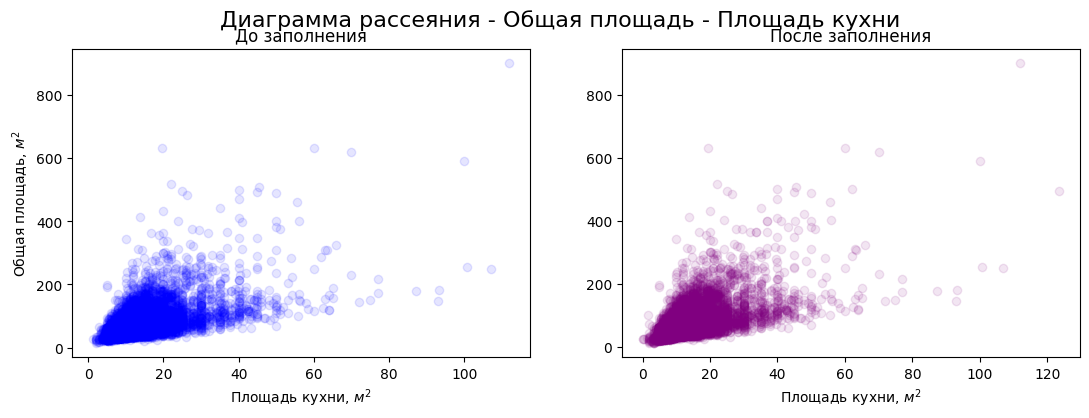

In [907]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

ax1.scatter(
    x=df_dump_kitchen_area,
    y=df['total_area'],
    alpha=0.1,
    color='blue'
)
ax1.set_title('До заполнения')
ax1.set_xlabel('Площадь кухни, $м^2$')
ax1.set_ylabel('Общая площадь, $м^2$')

ax2.scatter(
    x=df['kitchen_area'],
    y=df['total_area'],
    alpha=0.1,
    color='purple'
)
ax2.set_title('После заполнения')
ax2.set_xlabel('Площадь кухни, $м^2$')

fig.suptitle('Диаграмма рассеяния - Общая площадь - Площадь кухни', fontsize=16)
plt.show()

**Вывод**

Пропуски в поле `kitchen_area` можно разделить на два класса.

* `Квартиры-студии`. Все объекты, являющиеся студиями не имеют значения в данном поле. Ввиду специфики планировки наиболее вероятными причинами пропусков являются:

          1. `Отсутствие` поля для ввода данных о площади кухни, так как кухня и жилая комната едины.
          2. `Пользователи` предпочитают указывать только жилую площадь по тем же причинам.
          3. Технические ошибки.

* `Не студии`. Для остальных объявлений с пропусками в `kitchen_area` обобщающих факторов не было выявлено, которые могли бы повлиять на отсутствие значений. Таким образом, предположительными причинами пропусков являются:

          1. Технические ошибки роботов.
          2. Намеренное или случайное изменение БД.

**Заполнение**

Было принято решение, что заполнение будет производится для всех объектов, исключая студии. Класс квартир-студий насчитывает `менее 200`. Площадь для кухни и жилой зоны едина, поэтому оставим пропуски в `kitchen_area`, а в `living_area` сохраним.

Остальные же пропуски в `kitchen_area` заполним медианами, определёнными при помощи доли площади кухни к общей, группируя данные по количеству комнат. Однако, предусмотрим проверку на случай, когда `kitchen_area + living_area < 0.9 * total_area`, в таком случае `kitchen_area = total_area - living_area`. Коэффициент `0.9` учитывает, что площадь коридоров, санузлов и тд учитывается только в `общей площади`.

#### 2.2.13. living_area

В данном поле указана `площадь жилой зоны`. Изучим данные подробнее:

In [908]:
pass_values_share(df['living_area'])

Пропущено 1903 значений. Это состовляет 8.0% от общего количества.


In [909]:
# Некоторые статистики для `living_area` при группировке по `rooms`
get_med_notNaN_NaN_group('rooms', 'living_area')

,median,not NaN,NaN
rooms,,,
0,18.000,139,10
1,17.600,7432,662
2,30.500,7296,644
3,45.000,5366,448
4,63.600,1089,92
5,91.785,292,34
6,123.900,99,6
7,145.000,53,6
8,161.000,12,0


`Общая площадь` состоит из суммы `площади кухни`, `жилой площади` и `дополнительное пространство`. Первые 2 поля полностью заполнены. Поэтмоу вычислим следующим образом `жилая площадь = общая площадь * 0.9 - площадь кухни`. Исключениями будут являтся `0-комнатные` объявления, для них `жилую площадь` определим с помощью медианы доли `площади кухни` по этому классу. Такой подход обусловлен тем, что `0-комнатные` являются студиями, для них `kitchen_area` и `living_area` едины. Однако, `kitchen_area` было принято решение не указывать.

In [910]:
# Сохраним копию исходного `living_area`
df_dump_living_area = df['living_area'].copy()

In [911]:
# "Заполнение" студий
df.loc[(df['studio']) & (df['living_area'].isna()), 'living_area'] =\
    df['total_area'] * (df['living_area'] / df['total_area']).median()

# check
pass_values_share(df.loc[df['studio'], 'living_area'])

Пропущенные значения отсутствуют (o^▽^o)


In [912]:
# Заполнение оставшихся пропусков
df.loc[df['living_area'].isna(), 'living_area'] = df['total_area'] * 0.9 - df['kitchen_area']

# check
pass_values_share(df['living_area'])

Пропущенные значения отсутствуют (o^▽^o)


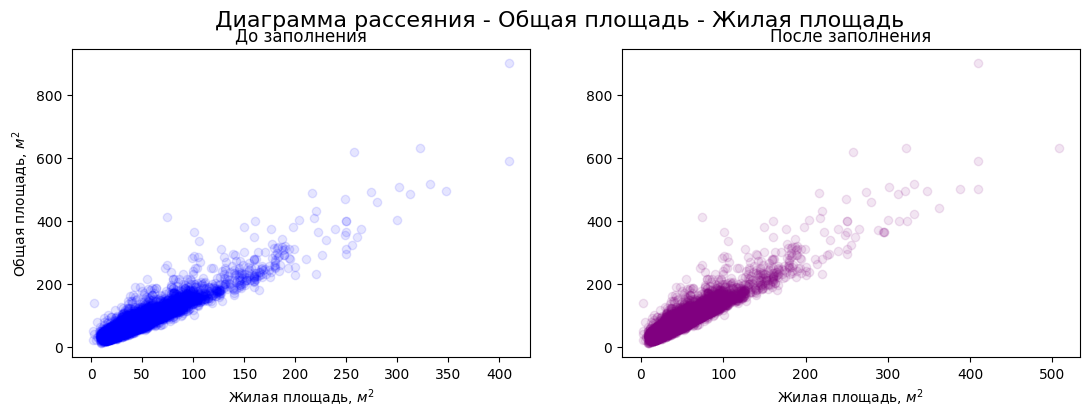

In [913]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

ax1.scatter(
    x=df_dump_living_area,
    y=df['total_area'],
    alpha=0.1,
    color='blue'
)
ax1.set_title('До заполнения')
ax1.set_xlabel('Жилая площадь, $м^2$')
ax1.set_ylabel('Общая площадь, $м^2$')

ax2.scatter(
    x=df['living_area'],
    y=df['total_area'],
    alpha=0.1,
    color='purple'
)
ax2.set_title('После заполнения')
ax2.set_xlabel('Жилая площадь, $м^2$')

fig.suptitle('Диаграмма рассеяния - Общая площадь - Жилая площадь', fontsize=16)
plt.show()

**Вывод**

Данные с пропусками в `living_area` можно разделить на 2 класса:

* ***Квартиры-студии***. Таких объявлений немного, но достаточно для вычисления хорошей статистики. Специфика сотоит в том, что `площадь кухни` и `жилая площадь` едины. Определим `living_area` через медианную долю жилой площади по студиям.

* ***Остальные***. `Общая площадь` и `площадь кухни` полностью заполнены. Поэтмоу вычислим следующим образом `жилая площадь = общая площадь * 0.9 - площадь кухни`. `0.9` - это коэффициент предусматривает санузлы, коридоры и тд, которые учитываются долько в `total_area`.

После заполнение появилось несколько аномально больших значений, однако других аномалий не видно.

#### 2.2.14. floors_total

В данном поле указано общее количество потолков в доме. Изучим данные подробнее:

In [914]:
# Статистики по этажам квартир, при пропусках в этажности здания
df.loc[df['floors_total'].isna(), 'floor'].describe()

count    86.000000
mean     10.023256
std       6.210005
min       1.000000
25%       5.000000
50%       8.000000
75%      13.750000
max      24.000000
Name: floor, dtype: float64

**Гипотеза:** заполнение пропусков в поле `floors_total` соответствующими значениями из `floor` позволит сохранить данные и не создать аномалии.

In [915]:
# Заполнение пропусков
df.loc[df['floors_total'].isna(), 'floors_total'] = df['floor']

# check
pass_values_share(df['floors_total'])

Пропущенные значения отсутствуют (o^▽^o)


**Вывод:** достоверную этажность здания по предоставленным данным не определить. Единственное ограничение, которое можно наложить на подставляемые значения - это этажность здания не должна быть меньше этажа квартиры. Учитывая эти факты, пропуски в поле `floors_total` заполним соответствующими значениями из `floor`.

### 2.3. Преобразование типов данных

Определим поля с некорректными типами данных:

In [916]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23550 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Следующие столбцы `days_exposition`, `last_price`, `floors_total`, `balcony`, `parks_around_3000`, `ponds_around_3000` должны иметь целочисленные значения, т.к. к данным в этих столбцах логически не возможно применить не целочисленные значения.

Столбец `first_day_exposition` содержит даты, по этой причине, к данным этого столбца, необходимо применять формат даты.

Столбцы `living_area` и `kitchen_area` могут иметь десятичный формат данных, по этой причине к данным этого столбца применяем соответствующий тип данных.

In [917]:
# Приведение к целочисленному типу данных
for name in ['last_price', 'floors_total', 'balcony', 'parks_around_3000', 'ponds_around_3000']:
    df[name] = df[name].astype(int)

# Изменение формата даты
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# Округление данных в столбцах `living_area` и `kitchen_area` до одного знака после запятой
df['living_area'] = round(df['living_area'], 1)
df['kitchen_area'] = round(df['kitchen_area'], 1)

# Поле `days_exposition` содержит пропуски, поэтому округлим значения до целого числа
df['days_exposition'] = round(df['days_exposition'], 0)

### 2.4. Добавление новых полей

Для последующего анализа потребуется ряд доплнительных параметров.

#### 2.4.1. Удаление долевых полей

Удалим поля, которые были созданы ранее в предобработке: `share_kitchen_area` и `share_living_area`

In [918]:
additional_columns = ['share_kitchen_area', 'share_living_area']
df.drop(additional_columns, axis=1, inplace=True)

# check
if any(column in df.columns for column in additional_columns):
    print('Что-то полно не так')
else:
    print('Дополнительные поля удалены')

Дополнительные поля удалены


#### Цена одного квадратного метра (округлить до двух знаков после запятой)

In [919]:
df['price_one_square_meter'] = round(df.last_price / df.total_area, 2)

#### День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [920]:
df['publication_weekday'] = df.first_day_exposition.dt.dayofweek

#### Месяц публикации объявления

In [921]:
df['publication_week'] = df.first_day_exposition.dt.month

#### Год публикации объявления

In [922]:
df['publication_year'] = df.first_day_exposition.dt.year

#### Тип этажа квартиры (значения — «‎первый», «последний», «другой»)

In [923]:
def get_floor_type(ad) -> str:
    '''Определяет тип этажа: первый, последний, другой'''
    if ad.floor == 1:
        return 'первый'
    elif ad.floor == ad.floors_total:
        return 'последний'
    elif 1 < ad.floor < ad.floors_total:
        return 'другой'

In [924]:
df['floor_type'] = df.apply(get_floor_type, axis=1)

#### Расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений)

In [925]:
df['city_centers_distance'] = round(df.city_centers_nearest / 1000, 2)

### 2.5. Поиск, проверка и устранение аномальных значений

*Аномальные значения* - это данные, которые выбиваются из общей массы, либо в большую, либо в меньшую сторону, например.

Данные можно разделить на множество различных по специфики клсаам: населённый пункт, количество комнат и тд. Разделение на все классы приведёт к тому, что в каждом классе будет слишком мало информации, да и данные классов нужно так же проанализировать на аномалии в совокупности. Другими словами, такой вариант обработки не подойдёт.

**Метод обработки аномалий:** будем рассматривать все данные в купе и отслеживать общий проценкт удаляемых строк. 
> Для этапа предобработки недопустимым является удаление 10% строк, оптимальным - 5%.

In [926]:
# Переменная с долей удалённых данных
removed_share = 1 - df.shape[0] / 23699
print(f'Процент удалённых значений: {removed_share * 100:.2f}%')

Процент удалённых значений: 0.00%


Учитывая цель данного исследования, выделим параметры, которые необходимо обработать от аномалий, остальные просто изучим:

<div>✅ цена объекта</div>
<div>✅ общая площадь</div>
<div>✅ жилая площадь</div>
<div>✅ площадь кухни</div>
<div>✅ количество комнат</div>
<div>✅ высота потолков</div>
<div>✅ тип этажа квартиры («первый», «последний», «другой»)</div>
<div>✅ общее количество этажей в доме</div>
<div>✅ расстояние до центра города в метрах</div>
<div>✅ расстояние до ближайшего парка</div>

#### 2.4.1. total_images

В данном поле указано `общее количество выставленных фотографий`, тип целочисленный.

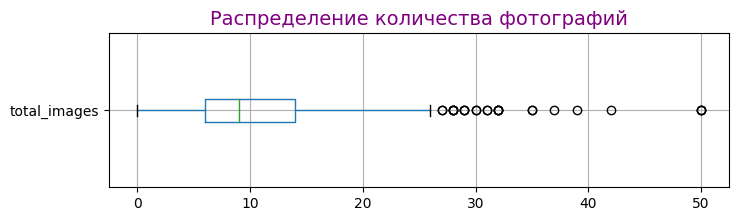

In [927]:
df.boxplot('total_images', vert=False, figsize=(8, 2))
plt.title('Распределение количества фотографий', fontsize=14, color='purple')
plt.show()

**Вывод:** в данных наблюдаются некоторые немного выбивающиеся значения, но вероятнее всего они не окажут значительного влияния во время анализа. Сохраних их.

#### 2.4.2. last_price

В данном поле указана `цена продажи` квартиры, тип целочисленный.

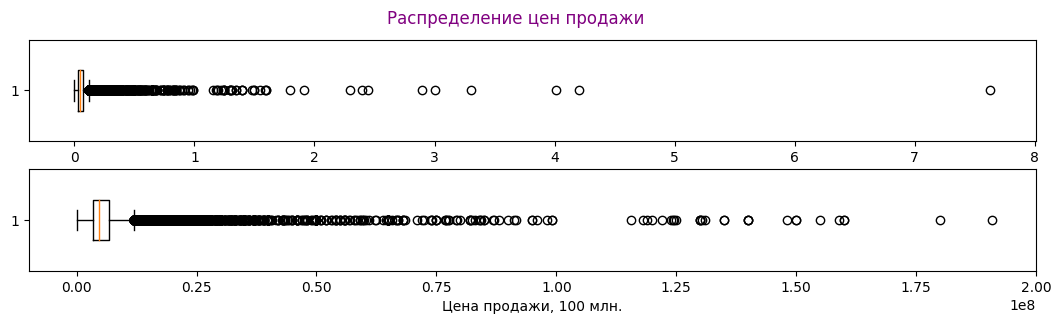

In [928]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 3))

ax1.boxplot(df['last_price'], vert=False, widths=0.4)

# Детализируем данные
ax2.boxplot(df['last_price'], vert=False, widths=0.4)
ax2.set_xlim([-1 * 10**7, 2 * 10**8])
ax2.set_xlabel('Цена продажи, 100 млн.')

plt.suptitle('Распределение цен продажи', color='purple')
plt.subplots_adjust(hspace = 0.28)
plt.show()

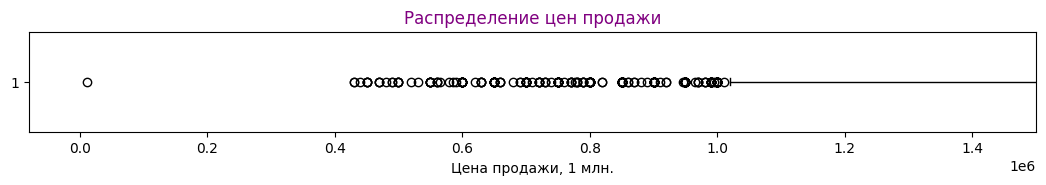

In [929]:
# Детализируем данные
fig, ax = plt.subplots(figsize=(13, 1.3))

ax.boxplot(df['last_price'], vert=False, whis=0.7)
ax.set_title('Распределение цен продажи', color='purple')
ax.set_xlim([-8 * 10**4, 1.5*10**6])
ax.set_xlabel('Цена продажи, 1 млн.')

plt.show()

In [930]:
# Рассмотрим объект стоимостью ниже 400_000
df.query('last_price < 400_000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,publication_weekday,publication_week,publication_year,floor_type,city_centers_distance
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,805.0,0,NaN,8.0,111.83,2,3,2019,последний,9.18


Судя по диаграммам аномальными значениями являются объекты со стоимостью продажи `более 100 млн`, а так же есть одна квартира из центральной части Петербурга стоимостью всего `12_190`, вероятно, ошибка при вводе данных, неисправность робота или искажение данных. Так как объект с аномально малой стоимостью всего 1, поэтому не будем заниматься восстановление цены.

In [931]:
# Определяем прощент анамалий от общего исходного числа объявлений
current_removed_share = df.query('last_price > 100_000_000').shape[0] / 23699
current_removed_share += df.query('last_price < 100_000').shape[0] / 23699
print(f'Процент удаляемых значений: {current_removed_share * 100:.2f}%')

Процент удаляемых значений: 0.16%


In [932]:
# Удаляем аномалии
df = df.query('100_000 < last_price < 100_000_000')

In [933]:
# Изменение доли удалённых пропусков
removed_share += current_removed_share
print(f'Общий процент удалённых значений: {removed_share * 100:.2f}%')

Общий процент удалённых значений: 0.16%


#### 2.4.3. total_area

В данном поле указана `общая площадь объекта`, тип числа с плавающей запятой.

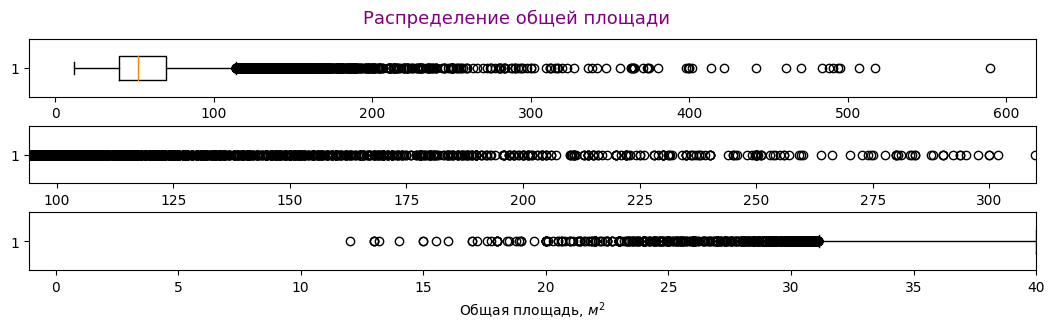

In [934]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(13, 3))

ax1.boxplot(df['total_area'], vert=False, widths=0.4)

# Детализация графика
ax2.boxplot(df['total_area'], vert=False, widths=0.4, whis=0.3)
ax2.set_xlim([94, 310])

# Детализация графика
ax3.boxplot(df['total_area'], vert=False, widths=0.4, whis=0.3)
ax3.set_xlim([-1.1, 40])
ax3.set_xlabel('Общая площадь, $м^2$')

plt.suptitle('Распределение общей площади', fontsize=13, color='purple')
plt.subplots_adjust(hspace=0.5)
plt.show()

Относительно совокупности данных аномальными являются значения `меньше 20` $м^2$ и `больше 205` $м^2$.

In [935]:
# Определяем долю аномалий относительно искомого числа объявлений
current_removed_share = df.query('total_area < 20 | 205 < total_area').shape[0] / 23699
print(f'Процент удаляемых значений: {current_removed_share * 100:.2f}%')

Процент удаляемых значений: 0.87%


In [936]:
# Удаляем аномалии
df = df.query('20 <= total_area <= 205')

In [937]:
# check
print('Количество аномалий:', df.query('total_area < 20 | 205 < total_area').shape[0])

Количество аномалий: 0


In [938]:
# Изменение доли удалённых пропусков
removed_share += current_removed_share
print(f'Общий процент удалённых значений: {removed_share * 100:.2f}%')

Общий процент удалённых значений: 1.03%


#### 2.4.4. first_day_exposition

В данном поле указана `дата публикации объявления`.

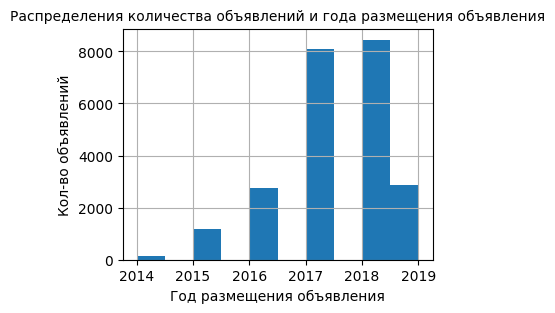

In [939]:
fig, ax = plt.subplots(figsize=(4, 3))

ax = df['first_day_exposition'].dt.year.hist(bins=10)
ax.set_title('Распределения количества объявлений и года размещения объявления', fontsize=10)
ax.set_ylabel('Кол-во объявлений')
ax.set_xlabel('Год размещения объявления')

plt.show()

**Вывод:** аномалий не обнаружено.

#### 2.4.5. rooms

В данном поле указано `количество комнат`, тип целочисленный.

In [940]:
# Определение количество объявлений по количеству комнат
ads_by_rooms = df['rooms'].value_counts()

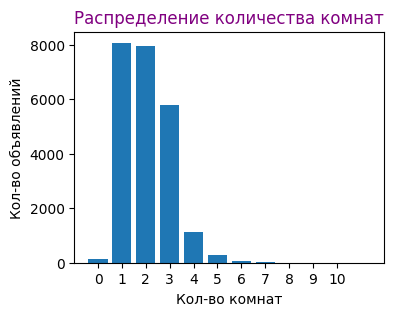

In [941]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.bar(ads_by_rooms.index, ads_by_rooms)
ax.set_title('Распределение количества комнат', color='purple')
ax.set_ylabel('Кол-во объявлений')
ax.set_xticks(range(11))
ax.set_xlabel('Кол-во комнат')

plt.show()

Выявлено 2 вида аномалий:

1. `0-комнатные` квартиры - это квартиры студии. Чтобы устранить данную аномалию, переведём их в класс `1-комнатные`.

2. `Слишком много комнат` относительно общей массы данных. К этому виду относятся квартиры с количество комнат `более 6`. Данный вид объявлений удалим.

In [942]:
# Изменение класса 0 -> 1
df['rooms'].mask(df['rooms'] == 0, 1, inplace=True)
# check
print('Кол-во 0-комнатных квартир:', df.query('rooms == 0').shape[0])

Кол-во 0-комнатных квартир: 0


In [943]:
# Определяем долю аномалий относительно искомого числа объявлений
current_removed_share = df.query('rooms > 6').shape[0] / 23699
print(f'Процент удаляемых значений: {current_removed_share * 100:.2f}%')

Процент удаляемых значений: 0.12%


In [944]:
# Удаляем аномалии
df = df.query('rooms <= 6')

In [945]:
# Изменение доли удалённых пропусков
removed_share += current_removed_share
print(f'Общий процент удалённых значений: {removed_share * 100:.2f}%')

Общий процент удалённых значений: 1.15%


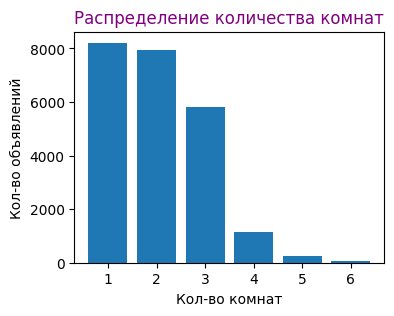

In [946]:
# Обновляем значения
ads_by_rooms = df['rooms'].value_counts()

# check# Обновляем значения
ads_by_floors_total = df['floors_total'].value_counts()
fig, ax = plt.subplots(figsize=(4, 3))

ax.bar(ads_by_rooms.index, ads_by_rooms)
ax.set_title('Распределение количества комнат', color='purple')
ax.set_ylabel('Кол-во объявлений')
ax.set_xlabel('Кол-во комнат')

plt.show()

#### 2.4.6. ceiling_height

В данном поле указана `высота потолков`, тип вещественные числа.

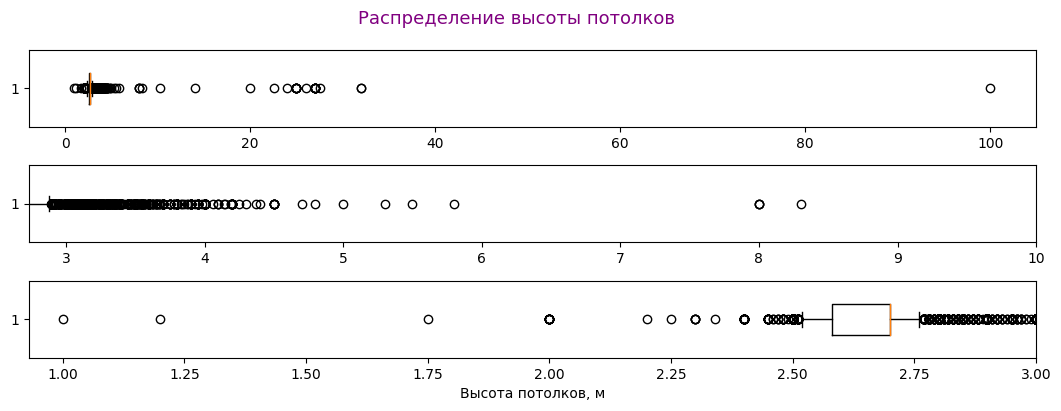

In [947]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(13, 4))

ax1.boxplot(df['ceiling_height'], vert=False, widths=0.4)

# Детализация графика
ax2.boxplot(df['ceiling_height'], vert=False, widths=0.4)
ax2.set_xlim([2.73, 10])

# Детализация графика
ax3.boxplot(df['ceiling_height'], vert=False, widths=0.4, whis=0.5)
ax3.set_xlim([0.93, 3])
ax3.set_xlabel('Высота потолков, м')

plt.suptitle('Распределение высоты потолков', fontsize=13, color='purple')
plt.subplots_adjust(hspace=0.5)
plt.show()

Исходя из гарфического представления данных, аномальными значениями относительно общей массы данных являются потолки `ниже 2.45 м.` и `выше 3.7 м.`. Эти аномалии содержат, как значения, являющихся ошибкой, например потолки выше 10 метров, так и просто выбивающиеся из данной выборки. Таким образом, аномалии будут удалены.

In [948]:
# Определяем долю аномалий относительно искомого числа объявлений
current_removed_share = df.query('ceiling_height < 2.45 | 3.7 < ceiling_height').shape[0] / 23699
print(f'Процент удаляемых значений: {current_removed_share * 100:.2f}%')

Процент удаляемых значений: 0.81%


In [949]:
# Удаляем аномалии
df = df.query('2.45 <= ceiling_height <= 3.7')

In [950]:
# Изменение доли удалённых пропусков
removed_share += current_removed_share
print(f'Общий процент удалённых значений: {removed_share * 100:.2f}%')

Общий процент удалённых значений: 1.97%


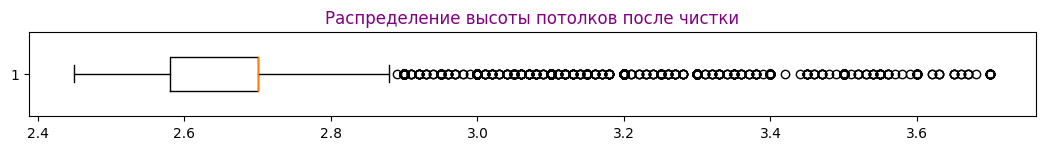

In [951]:
# check
fig, ax = plt.subplots(figsize=(13, 1.1))

ax.boxplot(df['ceiling_height'], vert=False, widths=0.4)
ax.set_title('Распределение высоты потолков после чистки', color='purple')

plt.show()

#### 2.4.7. floors_total

В данном поле указана `высота здания квартиры`, тип целочисленный.

In [952]:
# Определение количество объявлений по количеству комнат
ads_by_floors_total = df['floors_total'].value_counts()

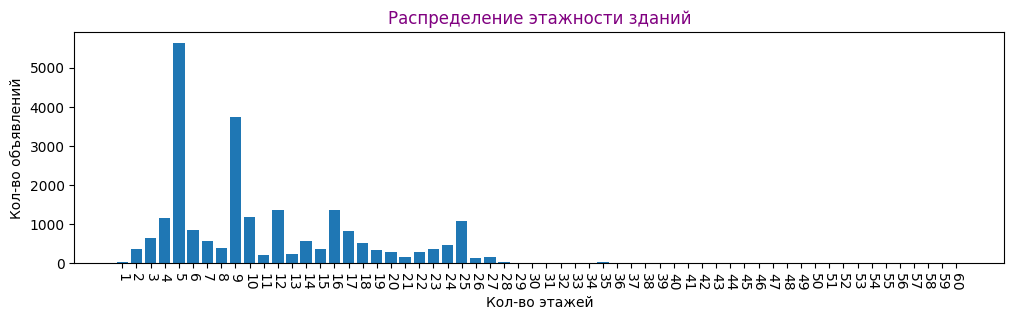

In [953]:
# check
fig, ax = plt.subplots(figsize=(12, 3))

ax.bar(ads_by_floors_total.index, ads_by_floors_total)
ax.set_title('Распределение этажности зданий', color='purple')
ax.set_ylabel('Кол-во объявлений')
ax.set_xlabel('Кол-во этажей')

plt.xticks(ticks=range(ads_by_floors_total.index.min(), ads_by_floors_total.index.max() + 1), rotation=-90)
plt.show()

По графику видно, что аномалиями относительно общей массы данных являются объявления с этажностью зданий `ниже 2 этажей` и `выше 27 этажей`. График получился очень длинным это связано с тем, что встречаются значения до 60 этажей включительно. Вероятно, что часть этих значений является ошибкой (например, пользователя, алгоритмов), другие же просто аномальны относительно данной выборки. Удалим аномальные значения.

In [954]:
# Определяем долю аномалий относительно искомого числа объявлений
current_removed_share = df.query('floors_total < 2 | 27 < floors_total').shape[0] / 23699
print(f'Процент удаляемых значений: {current_removed_share * 100:.2f}%')

Процент удаляемых значений: 0.33%


In [955]:
# Удаляем аномалии
df = df.query('2 <= floors_total <= 27')

In [956]:
# Изменение доли удалённых пропусков
removed_share += current_removed_share
print(f'Общий процент удалённых значений: {removed_share * 100:.2f}%')

Общий процент удалённых значений: 2.30%


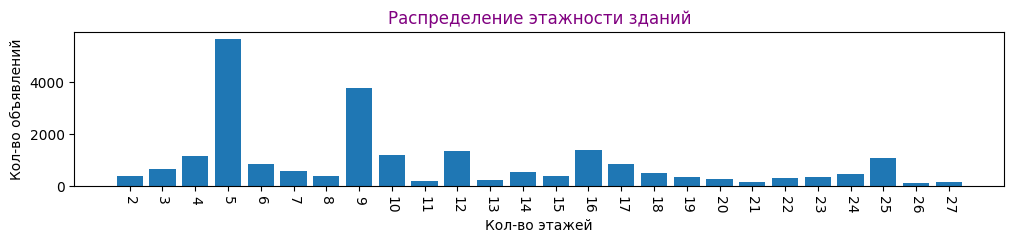

In [957]:
# Обновляем значения
ads_by_floors_total = df['floors_total'].value_counts()

# check
fig, ax = plt.subplots(figsize=(12, 2))

ax.bar(ads_by_floors_total.index, ads_by_floors_total)
ax.set_title('Распределение этажности зданий', color='purple')
ax.set_ylabel('Кол-во объявлений')
ax.set_xlabel('Кол-во этажей')

plt.xticks(ticks=range(ads_by_floors_total.index.min(), ads_by_floors_total.index.max() + 1), rotation=-90)
plt.show()

#### 2.4.8. living_area

В данном поле указана `жилая площадь` квартиры, тип вещественные числа.

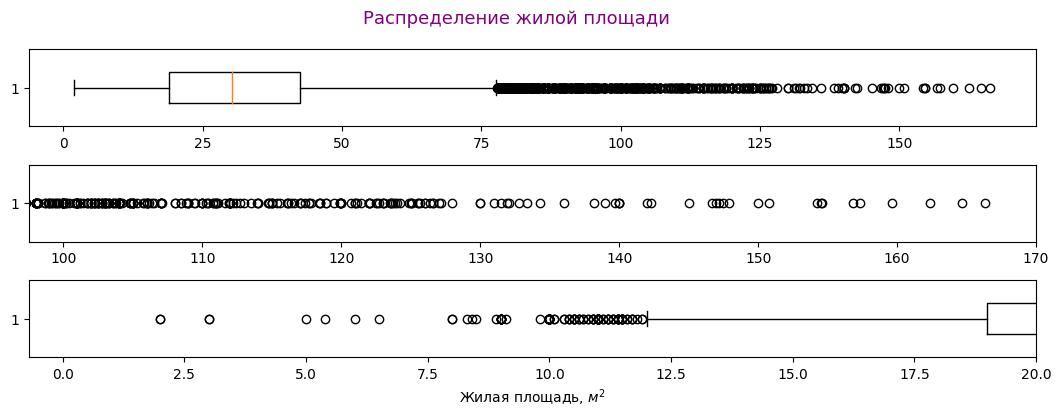

In [958]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(13, 4))

ax1.boxplot(df['living_area'], vert=False, widths=0.4)

# Детализация графика
ax2.boxplot(df['living_area'], vert=False, widths=0.4)
ax2.set_xlim([97.5, 170])

# Детализация графика
ax3.boxplot(df['living_area'], vert=False, widths=0.4, whis=0.3)
ax3.set_xlim([-0.7, 20])
ax3.set_xlabel('Жилая площадь, $м^2$')

plt.suptitle('Распределение жилой площади', fontsize=13, color='purple')
plt.subplots_adjust(hspace=0.5)
plt.show()

По графикам видно, что аномальными относительно общей массы данных являются объявления с жилой площадью `меньше 10` и `больше 129` $м^2$. Удалим аномалии.

In [959]:
# Определяем долю аномалий относительно искомого числа объявлений
current_removed_share = df.query('living_area < 10 | 129 < living_area').shape[0] / 23699
print(f'Процент удаляемых значений: {current_removed_share * 100:.2f}%')

Процент удаляемых значений: 0.25%


In [960]:
# Удаляем аномалии
df = df.query('10 <= living_area <= 129')

In [961]:
# Изменение доли удалённых пропусков
removed_share += current_removed_share
print(f'Общий процент удалённых значений: {removed_share * 100:.2f}%')

Общий процент удалённых значений: 2.55%


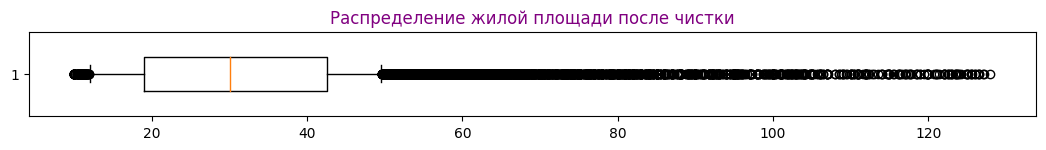

In [962]:
# check
fig, ax = plt.subplots(figsize=(13, 1.1))

ax.boxplot(df['living_area'], vert=False, widths=0.4, whis=0.3)
ax.set_title('Распределение жилой площади после чистки', color='purple')

plt.show()

#### 2.4.9. floor

В данном поле указан `этаж расположения квартиры`, тип целочисленный.

In [963]:
# Определение количество объявлений по этажам
ads_by_floor = df['floor'].value_counts()

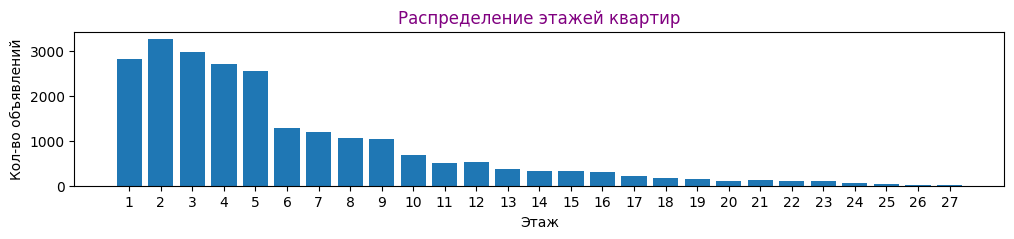

In [964]:
fig, ax = plt.subplots(figsize=(12, 2))

ax.bar(ads_by_floor.index, ads_by_floor)
ax.set_title('Распределение этажей квартир', color='purple')
ax.set_ylabel('Кол-во объявлений')
ax.set_xlabel('Этаж')

plt.xticks(ticks=range(ads_by_floor.index.min(), ads_by_floor.index.max() + 1))
plt.show()

По графику видно, что аномалиями относительно общей массы данных являются квартиры расположенные зданий `выше 24 этажа`.

In [965]:
# Определяем долю аномалий относительно искомого числа объявлений
current_removed_share = df.query('24 < floor').shape[0] / 23699
print(f'Процент удаляемых значений: {current_removed_share * 100:.2f}%')

Процент удаляемых значений: 0.30%


In [966]:
# Удаляем аномалии
df = df.query('floor <= 24')

In [967]:
# Изменение доли удалённых пропусков
removed_share += current_removed_share
print(f'Общий процент удалённых значений: {removed_share * 100:.2f}%')

Общий процент удалённых значений: 2.85%


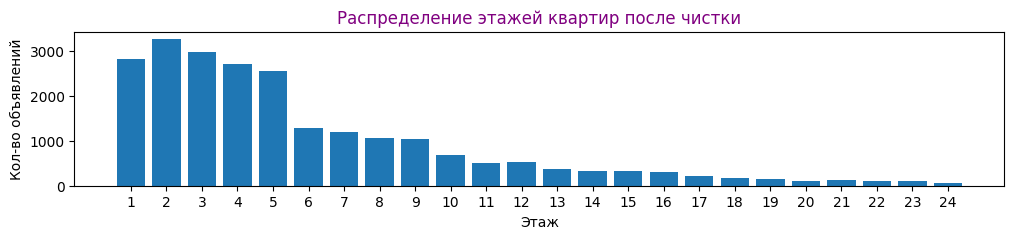

In [968]:
# Обновляем значения
ads_by_floor = df['floor'].value_counts()

# check
fig, ax = plt.subplots(figsize=(12, 2))

ax.bar(ads_by_floor.index, ads_by_floor)
ax.set_title('Распределение этажей квартир после чистки', color='purple')
ax.set_ylabel('Кол-во объявлений')
ax.set_xlabel('Этаж')

plt.xticks(ticks=range(ads_by_floor.index.min(), ads_by_floor.index.max() + 1))
plt.show()

#### 2.4.10. is_apartment

В данном поле указано `является ли квартира апартаментами`, тип булевый.

In [969]:
# Определение кол-ва значений по полю `is_apartment`
df.is_apartment.value_counts()

False    22982
True        42
Name: is_apartment, dtype: int64

**Вывод:** по сравнительной таблице видно, что апартаменов всего `42`, (состовляет `0.18%` от текущего количества объявлений). Объектов такого типа слишком мало для заключения качественных аналитических выводов. Сохраним эти данные, но во время анализа учтём их малое кол-во.

#### 2.4.11. studio

В данном поле указано `является ли квартира студией`, тип булевый.

In [970]:
# Определение кол-ва значений по полю `studio`
df.studio.value_counts()

False    22886
True       138
Name: studio, dtype: int64

**Вывод:** по сравнительной таблице видно, что студий всего `138` (состовляет `0.6%` от текущего количества объявлений). Объектов такого типа слишком мало для заключения качественных аналитических выводов. Сохраним эти данные, но во время анализа учтём их малое кол-во.

#### 2.4.12. open_plan

В данном поле указано `является ли планировка открытой`, тип булевый.

In [971]:
# Определение кол-ва значений по полю `studio`
df.open_plan.value_counts()

False    22962
True        62
Name: open_plan, dtype: int64

**Вывыд:** по сравнительной таблице видно, что  кваритр со свободной планировкой всего `62` (`0.26%` от текущего количества объявлений). Объектов такого типа слишком мало для заключения качественных аналитических выводов. Сохраним эти данные, но во время анализа учтём их малое кол-во.

#### 2.4.13. kitchen_area

В данном поле указана `площадь кухни`, тип вещественные числа.

Поле `kitchen_area` содержит пропуски. При обработки пропусков (см. *2.2.12.2.*) в этом поле было принято решение сохранить пропуски у квартир-студий. По этой причине с созданием некоторых диаграмм возникнут проблемы.

In [972]:
# Создание выборки без пропусков в поле `kitchen_area`
kitchen_area = df.loc[~df.kitchen_area.isna(), 'kitchen_area']

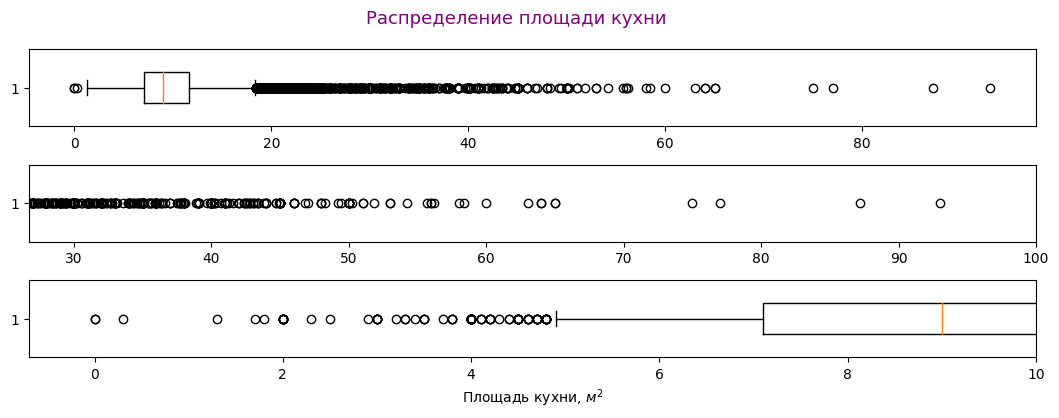

In [973]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(13, 4))

ax1.boxplot(kitchen_area, vert=False, widths=0.4)

# Детализация графика
ax2.boxplot(kitchen_area, vert=False, widths=0.4)
ax2.set_xlim([26.7, 100])

# Детализация графика
ax3.boxplot(kitchen_area, vert=False, widths=0.4, whis=0.5)
ax3.set_xlim([-0.7, 10])
ax3.set_xlabel('Площадь кухни, $м^2$')

plt.suptitle('Распределение площади кухни', fontsize=13, color='purple')
plt.subplots_adjust(hspace=0.5)
plt.show()

По графикам видно, что аномальными относительно общей массы данных являются объявления с площадью кухни `меньше 4` и `больше 44` $м^2$. Удалим аномалии.

In [974]:
# Определяем долю аномалий относительно искомого числа объявлений
current_removed_share = df.query('kitchen_area < 4 | 44 < kitchen_area').shape[0] / 23699
print(f'Процент удаляемых значений: {current_removed_share * 100:.2f}%')

Процент удаляемых значений: 0.38%


In [975]:
# Удаляем аномалии
df = df.loc[(4 < df.kitchen_area) & (df.kitchen_area < 44) | (df.kitchen_area.isna())]

In [976]:
# Изменение доли удалённых пропусков
removed_share += current_removed_share
print(f'Общий процент удалённых значений: {removed_share * 100:.2f}%')

Общий процент удалённых значений: 3.22%


In [977]:
# Обновим выборку без пропусков в `kitchen_area`
kitchen_area = df.loc[~df.kitchen_area.isna(), 'kitchen_area']

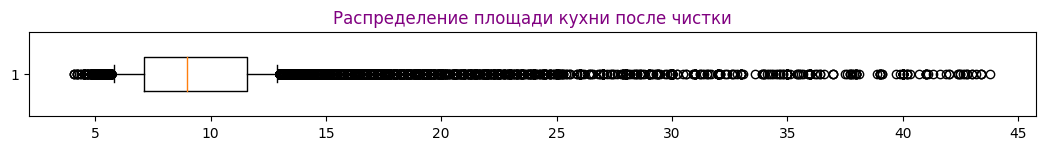

In [978]:
# check
fig, ax = plt.subplots(figsize=(13, 1.1))

ax.boxplot(kitchen_area, vert=False, widths=0.4, whis=0.3)
ax.set_title('Распределение площади кухни после чистки', color='purple')

plt.show()

#### 2.4.14. floor_type

В данном поле указан `тип этажа квартиры`, тип строка.

In [979]:
# Определение количество объявлений по этажам
ads_by_floor_type = df['floor_type'].value_counts()

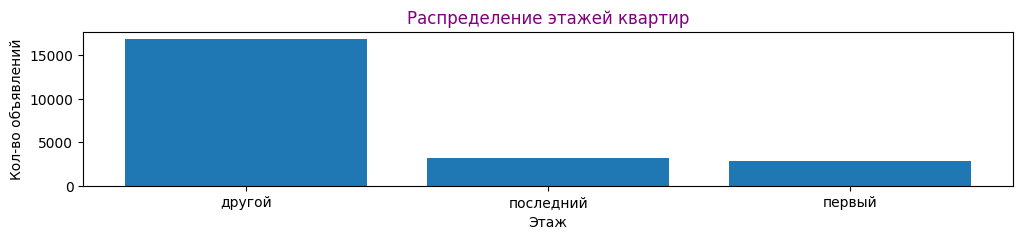

In [980]:
fig, ax = plt.subplots(figsize=(12, 2))

ax.bar(ads_by_floor_type.index, ads_by_floor_type)
ax.set_title('Распределение этажей квартир', color='purple')
ax.set_ylabel('Кол-во объявлений')
ax.set_xlabel('Этаж')

# plt.xticks(ticks=range(ads_by_floor_type.index.min(), ads_by_floor_type.index.max() + 1))
plt.show()

Меньшую долю занимают объявления о продаже квартир на `первом` и `последнем` этажах, остальные - `другие` этажи. Данных достаточно, чтобы строить качественные гипотезы. Аномалии отсутствуют.

#### 2.4.15. city_centers_nearest

В данном поле указана `расстояние до ближайшего центра города` относительно расположения объекта, тип вещественные числа.

Поле `city_centers_nearest` содержит пропуски. При обработки пропусков (см. *2.2.8*) в этом поле было принято решение сохранить такие объекты, чтобы не потерять данные. По этой причине с созданием некоторых диаграмм возникнут проблемы.

In [981]:
# Создание выборки без пропусков в поле `city_centers_nearest`
city_centers_nearest = df.loc[~df.city_centers_nearest.isna(), 'city_centers_nearest']

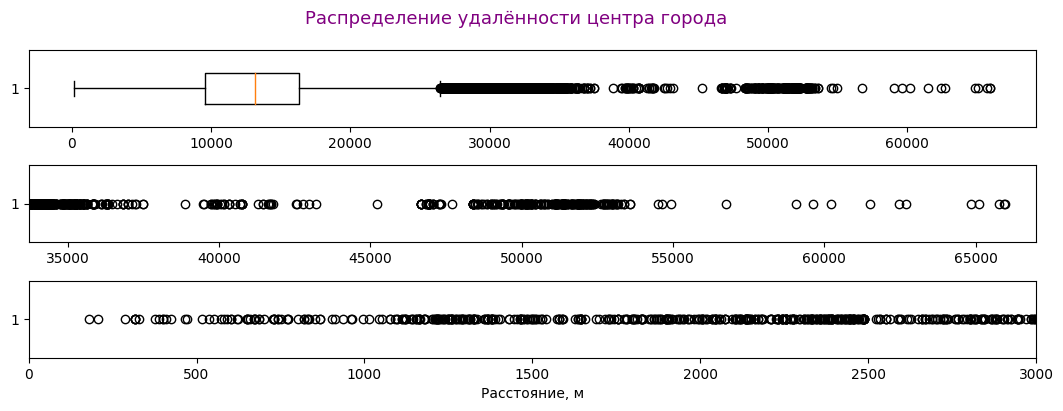

In [982]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(13, 4))

ax1.boxplot(city_centers_nearest, vert=False, widths=0.4)

# Детализация графика
ax2.boxplot(city_centers_nearest, vert=False, widths=0.4)
ax2.set_xlim([33_700, 67_000])

# Детализация графика
ax3.boxplot(city_centers_nearest, vert=False, widths=0.4, whis=0.3)
ax3.set_xlim([0, 3_000])
ax3.set_xlabel('Расстояние, м')

plt.suptitle('Распределение удалённости центра города', fontsize=13, color='purple')
plt.subplots_adjust(hspace=0.5)
plt.show()

По графикам видно, что аномальными относительно общей массы данных являются квартиры удалённые от центра города `более чем на 54_000 м`. Удалим аномалии.

In [983]:
# Определяем долю аномалий относительно искомого числа объявлений
current_removed_share = df.query('city_centers_nearest > 54_000').shape[0] / 23699
print(f'Процент удаляемых значений: {current_removed_share * 100:.2f}%')

Процент удаляемых значений: 0.06%


In [984]:
# Удаляем аномалии
df = df.loc[(df.city_centers_nearest <= 54_000) | (df.city_centers_nearest.isna())]

In [985]:
# Изменение доли удалённых пропусков
removed_share += current_removed_share
print(f'Общий процент удалённых значений: {removed_share * 100:.2f}%')

Общий процент удалённых значений: 3.29%


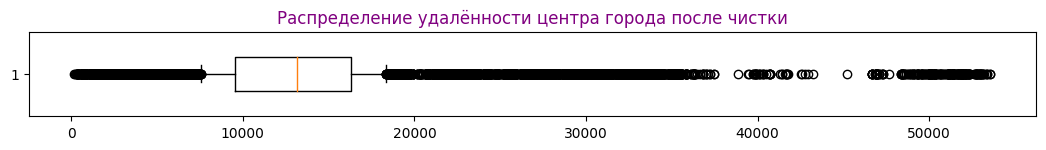

In [986]:
# Обновляем данные
city_centers_nearest = df.loc[~df.city_centers_nearest.isna(), 'city_centers_nearest']

# check
fig, ax = plt.subplots(figsize=(13, 1.1))

ax.boxplot(city_centers_nearest, vert=False, widths=0.4, whis=0.3)
ax.set_title('Распределение удалённости центра города после чистки', color='purple')

plt.show()

#### 2.4.16. parks_nearest

В данном поле указана `расстояние до ближайшего парка`, тип вещественные числа.

Поле `parks_nearest` содержит пропуски. При обработки пропусков (см. *2.2.2.*) в этом поле было принято решение сохранить такие объекты, чтобы не потерять данные. По этой причине с созданием некоторых диаграмм возникнут проблемы.

In [987]:
# Создание выборки без пропусков в поле `parks_nearest`
parks_nearest = df.loc[~df.parks_nearest.isna(), 'parks_nearest']

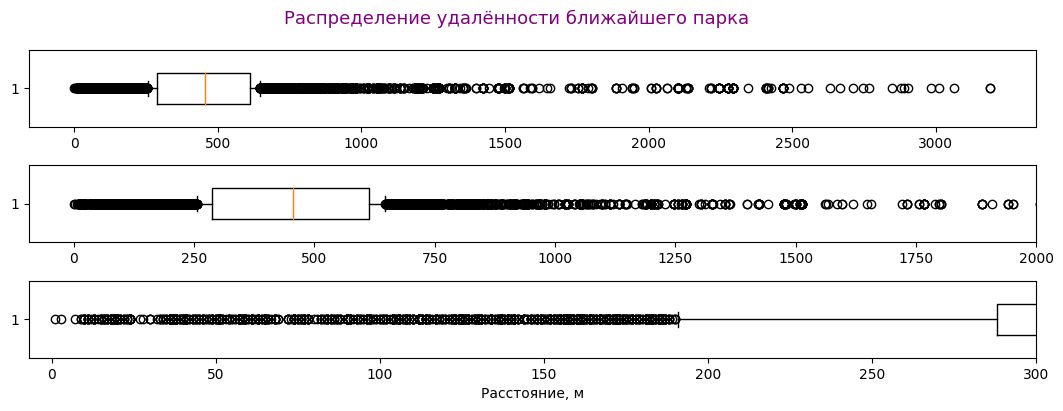

In [988]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(13, 4))

ax1.boxplot(parks_nearest, vert=False, widths=0.4, whis=0.1)

# Детализация графика
ax2.boxplot(parks_nearest, vert=False, widths=0.4, whis=0.1)
ax2.set_xlim([-94, 2_000])

# Детализация графика
ax3.boxplot(parks_nearest, vert=False, widths=0.4, whis=0.3)
ax3.set_xlim([-7, 300])
ax3.set_xlabel('Расстояние, м')

plt.suptitle('Распределение удалённости ближайшего парка', fontsize=13, color='purple')
plt.subplots_adjust(hspace=0.5)
plt.show()

По графикам видно, что аномальными относительно общей массы данных являются квартиры с ближайшим парком `более чем в 1_350 м`. Удалим аномалии.

In [989]:
# Определяем долю аномалий относительно искомого числа объявлений
current_removed_share = df.query('parks_nearest > 1_350').shape[0] / 23699
print(f'Процент удаляемых значений: {current_removed_share * 100:.2f}%')

Процент удаляемых значений: 0.86%


In [990]:
# Удаляем аномалии
df = df.loc[(df.parks_nearest <= 1_350) | (df.parks_nearest.isna())]

In [992]:
# Изменение доли удалённых пропусков
removed_share += current_removed_share
print(f'Общий процент удалённых значений: {removed_share * 100:.2f}%')

Общий процент удалённых значений: 4.15%


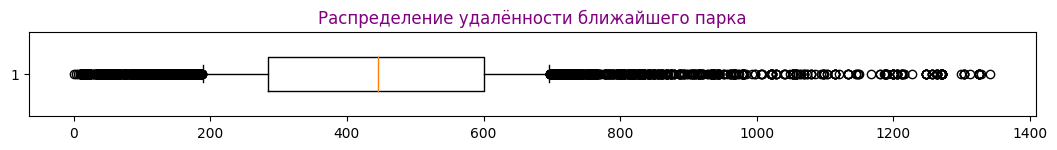

In [993]:
# Обновляем данные
parks_nearest = df.loc[~df.parks_nearest.isna(), 'parks_nearest']

# check
fig, ax = plt.subplots(figsize=(13, 1.1))

ax.boxplot(parks_nearest, vert=False, widths=0.4, whis=0.3)
ax.set_title('Распределение удалённости ближайшего парка', color='purple')

plt.show()

## 3. Анализ данных